<a href="https://colab.research.google.com/github/ssk450/Git_test/blob/main/%EC%9C%84%EC%95%84%ED%94%84%EB%A0%8C%EC%A6%88_23_12_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **개요**

# 1. 1차 분류
- 1.1 국적별 인원수 비교
- 1.2 사용언어 인원 수 확인
> L-Class 분류 (가칭)

# 2. 2차 분류
- 2.0 사용언어에 대한 선행 필터링? 아님 추가 점수제?
  - 요인별 차등 평가가 아닌 개별 점수제를 채택하여, 요인간의 차이를 최소화함 >>> 결정에 있어서 압도적인 우위 제거
  - 해당 요인에 대한 상대 점수는 추후 재결정해야 하는 요인(관심도,
- 2.1 개인 성향에 따른 점수 (1 ~10)
- 2.2 개인 관심사에 따른 점수 (1~15개)
- 2.3 사용언어 갯수 (1~5개)
- +) 갯수별 차등 점수 추가
- 2.4 기준 미달에 대한 대응 방안 (성향, 관심도, 언어 선택의 폭에 따른, 데이터 없는 경우도 존재)
> I-Class (가칭)



# 3. 3차 분류
  -2차 분류 데이터를 활용하여 상관 관계를 도출하여 향후 알고리즘 및 머신러닝에 필요한 모델링의 기초 자료로 활용한다.

* Standard -> class1를 class6에 연결 >>> class1이 Strength(강성도) 낮음 , class6은 Strength(강성도) 높음 -> 코딩 오류로 인해 class6에서 class4로 분류 정도 낮춤.
* 강성에 대한 것은 추후 개인 선호도나 매칭율을 참고하여 재설정하면 될듯

##   **0. Basic form of Data Processing**

- 1). Basic Setting
- 2). Call the files(.csv)

### 0.1 Basic Setting
 - 개발환경에 적합한 환경을 구성한다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,470 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import numpy as np   #넘파이 라이브러리(수치관련)
#import io #test용
import pandas as pd  #판다스 라이브러리(데이터분석)
import seaborn as sns #시각화 라이브러리
import matplotlib.pyplot as plt #시각화 라이브러리
import plotly.express  as px #seaborn에서 안되는 약간의 기능들이 더 있다.

#warnings 발생 방지
import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import set_matplotlib_formats

#warnings.filterwarnings(action='ignore')

import string
string.punctuation

plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"] = (8, 5)
plt.rc("axes", unicode_minus=False)  #마이너스 표시 깨짐 방지
set_matplotlib_formats("retina")     #출력되는 글자 좀 더 선명하게

### 0.2 Load the files(.csv)
  - from the G_Drive

  - 3 File (0. Raw Data_standard)
    - 2021_strangth_Table_character
    - 2021_strangth_Table_interest
    - 2021_strangth_Table_language

  - 3 File (0. Raw Data)
    - 2021_personal_profile(kOR)
    - 2021_personal_Nation with seleted thing
    - 2021 nation_per_Data


In [ ]:
#2-1.구글 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- loading columns's parameter



In [ ]:
# 요소별 점수 설정
stg0_lang_df = pd.read_csv('/content/drive/MyDrive/WEF/2021_strangth_Table_character.csv')
stg0_inter_df = pd.read_csv('/content/drive/MyDrive/WEF/2021_strangth_Table_interest.csv')
stg0_char_df = pd.read_csv('/content/drive/MyDrive/WEF/2021_strangth_Table_language.csv')

#stg0_char_df = pd.read_csv('/content/drive/MyDrive/2021_strangth_Table_language.csv',  encoding='cp949')
#뒤의 엔코딩 오류 발생으로 인한 제거

per_profile_df = pd.read_csv('/content/drive/MyDrive/WEF/2021_personal_profile(kOR).csv',  encoding='cp949')
per_nation_df = pd.read_csv('/content/drive/MyDrive/WEF/2021_personal_Nation with seleted thing.csv',  encoding='cp949')
Base_Data_df = pd.read_csv('/content/drive/MyDrive/WEF/2021 nation_per_Data.csv',  encoding='cp949')

In [ ]:
# 요소별 점수 설정
stg_lang_df = pd.read_csv('/content/drive/MyDrive/실습파일/data/2021_strangth_Table_character.csv',  encoding='cp949')
stg_inter_df = pd.read_csv('/content/drive/MyDrive/실습파일/data/2021_strangth_Table_interest.csv',  encoding='cp949')
stg_char_df = pd.read_csv('/content/drive/MyDrive/실습파일/data/2021_strangth_Table_language.csv',  encoding='cp949')

FileNotFoundError: ignored

#### Reference
- Raw Data_standard는 Raw Data에 필요한 기준 제시 및 Raw Data의 전처리에 필요한 치환 과정에 사용될 예정
- Raw Data의 데이터 연관성을 저해하는 요소 및 결측치, 이상치에 대한 전처리 필요

- csv 데이터의 type에 대한 유의 요소 확인됌 (오류 코드 참조)

# **1.  Analyze Data**
 - 1). 각 데이터의 인자들을 확인한다.
 - 2). 분석전 데이터의 결측치와 이상치에 대한 전처리를 실시한다.
 - 3). 데이터 요소 특성들을 분석하고 해당 요소들 간의 유의미한 관계를 탐색한다.
 - 4). 데이터 전저리 및 데이터 핵심 요인들을 그래프화하여 보다 효율적인 분석환경을 조성한다.


#### Reference
- 4). 데이터 전저리 및 데이터 핵심 요인들을 그래프화하여 보다 효율적인 분석환경을 조성한다.

  *   matplotlib에서 seaborn으로 대체 예정
  *   한글 깨짐에 대한 오류처리 필요



### 1.1 각 데이터의 인자들을 확인한다.

In [ ]:
stg0_lang_df.values

array([[1, 'strCharacterEng:', "I'm humorous", 'strCharacterKor:',
        '유머러스해요}]', 1],
       [2, 'strCharacterEng:', "I'm adventurous", 'strCharacterKor:',
        '모험심이 강해요}', 2],
       [3, 'strCharacterEng:', 'I like crowded places',
        'strCharacterKor:', '사람이 많은 곳을 좋아해요}', 3],
       [4, 'strCharacterEng:', 'I have a good voice', 'strCharacterKor:',
        '목소리가 좋아요}', 4],
       [5, 'strCharacterEng:', 'I can talk all day', 'strCharacterKor:',
        '하루종일 얘기할 수 있어요}', 5],
       [6, 'strCharacterEng:', "I'm a calm person", 'strCharacterKor:',
        '차분한 편이에요}]', 6],
       [7, 'strCharacterEng:', "I'm emotional", 'strCharacterKor:',
        '감성적이에요}', 7],
       [8, 'strCharacterEng:', "I'm kind to everybody",
        'strCharacterKor:', '다른사람에게 상냥해요}', 8],
       [9, 'strCharacterEng:', "I'm an easygoing person",
        'strCharacterKor:', '털털한 성격이에요}]', 9],
       [10, 'strCharacterEng:', 'I laugh a lot', 'strCharacterKor:',
        '웃음이 많아요}', 1],
       [11, '

In [ ]:
stg0_inter_df.values

array([[1, 'strInterestEng:', 'Shopping', ..., '쇼핑}', 1.0, nan],
       [2, 'strInterestEng:', 'Musical Instruments', ..., '악기}', 2.0,
        nan],
       [3, 'strInterestEng:', 'Camping', ..., '캠핑}', 3.0, nan],
       ...,
       [152, 'strInterestEng:', 'Atheism', ..., '무교}', 8.0, nan],
       [153, 'strInterestEng:', 'Minority religion', ..., '소수종교}]', 9.0,
        nan],
       [154, 'strInterestEng:', 'Rafting', ..., '래프팅}', nan,
        '*의도적 오류 point']], dtype=object)

In [ ]:
stg0_char_df.values

array([[1, 'strLanguageEng:', 'Dutch', 'strLanguageKor:', '네덜란드어}', 1],
       [2, 'strLanguageEng:', 'Russian', 'strLanguageKor:', '러시아어}]', 2],
       [3, 'strLanguageEng:', 'Malaysian', 'strLanguageKor:', '말레이시아어}',
        3],
       [4, 'strLanguageEng:', 'Vietnamese', 'strLanguageKor:', '베트남어}]',
        4],
       [5, 'strLanguageEng:', 'Bangla', 'strLanguageKor:', '뱅골어}]', 5],
       [6, 'strLanguageEng:', 'Spanish', 'strLanguageKor:', '스페인어}', 6],
       [7, 'strLanguageEng:', 'Arabic', 'strLanguageKor:', '아랍어}', 7],
       [8, 'strLanguageEng:', 'English', 'strLanguageKor:', '영어}]', 8],
       [9, 'strLanguageEng:', 'Italian', 'strLanguageKor:', '이탈리아어}', 9],
       [10, 'strLanguageEng:', 'Indonesian', 'strLanguageKor:',
        '인도네시아어}', 1],
       [11, 'strLanguageEng:', 'Japanese', 'strLanguageKor:', '일본어}', 2],
       [12, 'strLanguageEng:', 'Javanese', 'strLanguageKor:', '자와어}]', 3],
       [13, 'strLanguageEng:', 'Simplified Chinese', 'strLanguageKor:',
        '중국어 -

In [ ]:
per_profile_df.values

array([[40, 10,  1,  5,  5],
       [30,  3,  4,  1,  3],
       [30, 13,  4,  9,  3],
       ...,
       [10, 13,  1,  3,  1],
       [20, 11,  1,  3,  3],
       [10,  5,  5,  4,  3]])

In [ ]:
per_nation_df.values

array([[193.0, '미국', 'MALE', 1, 7, 15],
       [58.0, '스페인', 'FEMALE', 0, 4, 2],
       [76.0, '영국', 'MALE', 0, 1, 2],
       ...,
       [151.0, '필리핀', 'FEMALE', 0, 12, 1],
       [151.0, '필리핀', 'FEMALE', 0, 20, 1],
       [151.0, '필리핀', 'FEMALE', 0, 3, 2]], dtype=object)

In [ ]:
Base_Data_df.values

array([['미국', 40, 12.0, ..., nan, nan, nan],
       ['스페인', 76, 14.0, ..., 18.0, 8.0, nan],
       ['영국', 102, 72.0, ..., 6.0, 17.0, nan],
       ...,
       ['미국', 33, 34.0, ..., nan, nan, nan],
       ['미국', 32, 33.0, ..., 6.0, 18.0, nan],
       ['필리핀', 16, 18.0, ..., nan, nan, nan]], dtype=object)

* N-loading columns table


In [ ]:
stg0_lang_df.describe()
#요인 30개

,SLUG,Char_level
count,30.000000,30.000000
mean,15.500000,4.700000
std,8.803408,2.667169
min,1.000000,1.000000
25%,8.250000,2.250000
50%,15.500000,4.500000
75%,22.750000,7.000000
max,30.000000,9.000000


In [ ]:
stg0_inter_df.describe()
#요인 153개

,SLUG,inter_level
count,154.000000,153.000000
mean,77.500000,5.000000
std,44.600075,2.590468
min,1.000000,1.000000
25%,39.250000,3.000000
50%,77.500000,5.000000
75%,115.750000,7.000000
max,154.000000,9.000000


In [ ]:
stg0_char_df.describe()
#요인 19개

,SLUG,Lang_level
count,19.000000,19.000000
mean,10.000000,4.789474
std,5.627314,2.740214
min,1.000000,1.000000
25%,5.500000,2.500000
50%,10.000000,5.000000
75%,14.500000,7.000000
max,19.000000,9.000000


In [ ]:
per_profile_df.describe()
#선택 건수를 통한 차등 점수 추가 가능.

,보유 포인트,관심사 선택 건수,사용언어 선택 건수,성향 선택 건수,프로필사진 등록 건수
count,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000
mean,24.486146,9.545088,2.142947,5.213098,3.187154
std,130.719546,4.955538,1.215570,2.889131,0.503157
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,5.000000,1.000000,3.000000,3.000000
50%,30.000000,10.000000,2.000000,5.000000,3.000000
75%,30.000000,15.000000,3.000000,8.000000,3.000000
max,10370.000000,15.000000,5.000000,11.000000,7.000000


In [ ]:
per_nation_df.describe()
#성사건수 및 프로필 조회 등에 대한 상관치 조사 가능 >>> 하지만, 유의미한 값 도출에는 아직 적다고 판단.

,국적코드,채팅성사 건수,상대방 프로필 조회 수,자신 프로필 조회 수
count,5687.000000,5689.000000,5689.000000,5689.000000
mean,117.335326,1.104764,14.133591,24.995430
std,43.042968,4.846475,51.849534,132.885347
min,3.000000,0.000000,0.000000,0.000000
25%,89.000000,0.000000,1.000000,2.000000
50%,119.000000,0.000000,4.000000,7.000000
75%,151.000000,1.000000,10.000000,18.000000
max,204.000000,163.000000,1298.000000,7974.000000


In [ ]:
Base_Data_df.describe()
#의미 없음 >>> 파트별로 묶여서 평균을 계산해야함

,strInterest1,strInterest2,strInterest3,strInterest4,strInterest5,strInterest6,strInterest7,strInterest8,strInterest9,strInterest10,...,strCharacter6,strCharacter7,strCharacter8,strCharacter9,strCharacter10,strLangues1,strLangues2,strLangues3,strLangues4,strLangues5
count,1400.000000,1224.000000,1145.000000,1036.000000,932.000000,847.000000,779.000000,724.000000,658.000000,617.000000,...,574.000000,444.000000,350.000000,284.000000,216.000000,1400.000000,798.000000,381.000000,147.000000,73.000000
mean,51.604286,56.879902,60.378166,63.256757,65.015021,68.433294,69.381258,69.237569,69.945289,72.119935,...,13.797909,13.750000,13.205714,12.940141,14.578704,10.252857,10.842105,11.551181,10.768707,10.630137
std,41.936989,43.204143,41.085269,39.170009,39.656091,39.161060,38.636693,40.528274,40.782865,40.946852,...,8.591013,8.633136,8.075430,8.141414,7.071943,4.406643,5.087701,5.233559,5.143247,5.237437
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,21.750000,29.000000,34.000000,31.000000,38.000000,40.000000,29.750000,27.000000,29.000000,...,7.000000,7.000000,7.000000,7.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,33.000000,40.000000,50.000000,65.500000,71.000000,74.000000,74.000000,63.000000,73.000000,75.000000,...,12.000000,12.000000,12.000000,10.000000,14.000000,8.000000,8.000000,11.000000,11.000000,10.000000
75%,96.000000,99.000000,99.000000,99.000000,104.000000,107.000000,110.000000,110.000000,110.000000,112.000000,...,21.000000,20.000000,19.000000,18.000000,19.000000,11.000000,18.000000,18.000000,15.500000,15.000000
max,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,32.000000,31.000000,32.000000,32.000000,31.000000,19.000000,19.000000,20.000000,19.000000,19.000000


In [ ]:
#2-3.데이터크기확인
Base_Data_df.shape

(1400, 31)

In [ ]:
per_nation_df.shape

(5689, 6)

In [ ]:
per_profile_df.shape

(7940, 5)

## 1.2 분석전 데이터의 결측치와 이상치에 대한 전처리를 실시한다.
-> 2절로 넘겨서 한번에 처리할 예정

- per_nation_df에서는 선택 오류로 인한 결측치 2개 발견 확인 후 제거 실시
- per_profile_df의 결측치가 없는 정상 데이터 프레임으로 확인
- Base_Data_df에서 검출된 결측치는 선택의 갯수에 따른 결측치이므로 정상 데이터로 확인

In [ ]:
#결측치 확인. isna(), isnull()
per_nation_df.isna().sum()

국적코드            2
국적              2
성별              0
채팅성사 건수         0
상대방 프로필 조회 수    0
자신 프로필 조회 수     0
dtype: int64

In [ ]:
  #3-2. 국적 데이터수 count
  print(per_nation_df['국적'].count())
  print(per_nation_df['국적코드'].count())

  #5687개의 데이터 중 2개의 결측치 확인 (국적과 국적코드 동일)

5687
5687


In [ ]:
#결측치 확인 >>> 결측치 없음 확인
per_profile_df.isna().sum()

보유 포인트         0
관심사 선택 건수      0
사용언어 선택 건수     0
성향 선택 건수       0
프로필사진 등록 건수    0
dtype: int64

In [ ]:
Base_Data_df.isna().sum()

국적                   0
strInterest1         0
strInterest2       176
strInterest3       255
strInterest4       364
strInterest5       468
strInterest6       553
strInterest7       621
strInterest8       676
strInterest9       742
strInterest10      783
strInterest11      845
strInterest12      899
strInterest13      937
strInterest14      981
strInterest15     1039
strCharacter1        0
strCharacter2      238
strCharacter3      345
strCharacter4      539
strCharacter5      674
strCharacter6      826
strCharacter7      956
strCharacter8     1050
strCharacter9     1116
strCharacter10    1184
strLangues1          0
strLangues2        602
strLangues3       1019
strLangues4       1253
strLangues5       1327
dtype: int64

#### Reference
 - 오류가 검출되어 현재는 잠시 **보류**

In [ ]:
stg_lang_df.sort_values(by="---", ascending =False)

NameError: ignored

In [ ]:
stg_inter_df.sort_values(by="---", ascending =False)

NameError: ignored

In [ ]:
stg_char_df.sort_values(by="---", ascending =False)

NameError: ignored

## 1.3 데이터 요소 특성들을 분석하고 해당 요소들 간의 유의미한 관계를 탐색한다.

In [ ]:
per_profile_df.mean()

보유 포인트         24.486146
관심사 선택 건수       9.545088
사용언어 선택 건수      2.142947
성향 선택 건수        5.213098
프로필사진 등록 건수     3.187154
dtype: float64

In [ ]:
# 유의미성 없는 자료
Base_Data_df.mean()

strInterest1      51.604286
strInterest2      56.879902
strInterest3      60.378166
strInterest4      63.256757
strInterest5      65.015021
strInterest6      68.433294
strInterest7      69.381258
strInterest8      69.237569
strInterest9      69.945289
strInterest10     72.119935
strInterest11     70.394595
strInterest12     71.630739
strInterest13     69.928726
strInterest14     65.837709
strInterest15     54.792244
strCharacter1     10.435000
strCharacter2     12.292599
strCharacter3     12.237915
strCharacter4     13.045296
strCharacter5     14.221763
strCharacter6     13.797909
strCharacter7     13.750000
strCharacter8     13.205714
strCharacter9     12.940141
strCharacter10    14.578704
strLangues1       10.252857
strLangues2       10.842105
strLangues3       11.551181
strLangues4       10.768707
strLangues5       10.630137
dtype: float64

In [ ]:
# 국적에 따른 의미있는 자료 확인하기 어려움
per_nation_df.groupby(['국적']).mean()

,국적코드,채팅성사 건수,상대방 프로필 조회 수,자신 프로필 조회 수
국적,,,,
가나 공화국,67.0,1.200000,8.600000,26.800000
과테말라 공화국,75.0,0.000000,9.000000,15.000000
그리스,69.0,5.000000,39.000000,57.500000
나미비아공화국,135.0,0.000000,4.000000,0.000000
나이지리아,141.0,1.038462,18.115385,46.038462
...,...,...,...,...
프랑스,63.0,0.655172,7.068966,13.620690
피지,61.0,0.000000,38.000000,22.000000
필리핀,151.0,0.639019,6.929322,13.019276


In [ ]:
#여성 회원대비 남성 회원의 적극적인 38%~ 67% 이상 활발한 활동보임
#국적 코드 정보는 무시할 것
per_nation_df.groupby(['성별']).mean()

,국적코드,채팅성사 건수,상대방 프로필 조회 수,자신 프로필 조회 수
성별,,,,
FEMALE,118.894185,0.991517,11.810629,20.097555
MALE,113.617262,1.374777,19.672219,36.673409


## 1.4 데이터 전처리 및 데이터 핵심 요인들을 그래프화하여 보다 효율적인 분석환경을 조성한다.

In [ ]:
# 2-6. day 기준으로 구분
sns.scatterplot(x='성별', y='채팅성사 건수', data='성별', hue='국적코드')
# sns.scatterplot(x='total_bill', y='tip', data=tips, hue='time')

TypeError: ignored

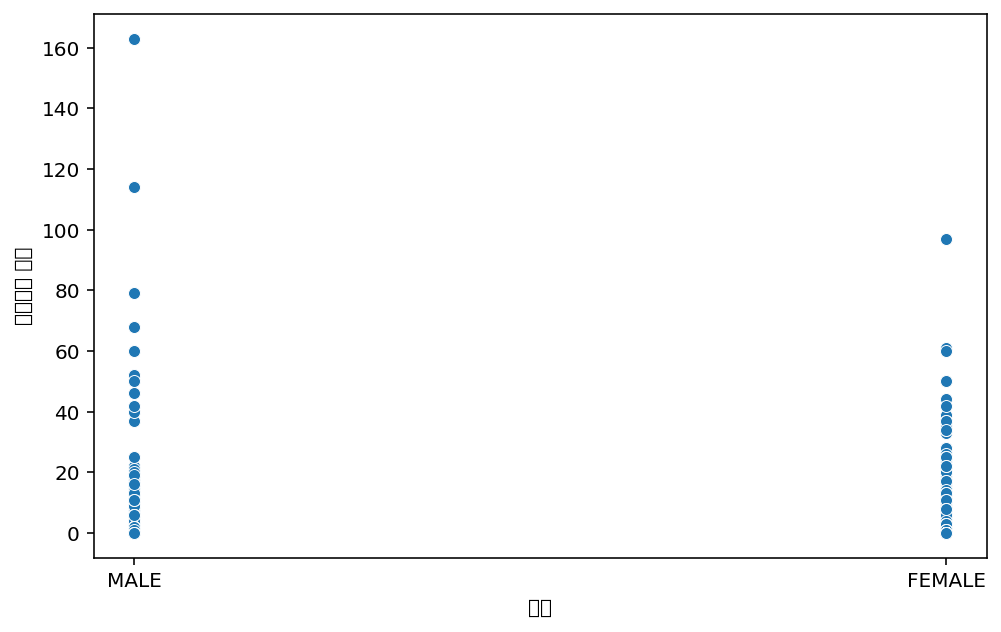

In [ ]:
sns.scatterplot(x=per_nation_df['성별'],y=per_nation_df['채팅성사 건수'])

Text(0, 0.5, 'Profile Contact Data')

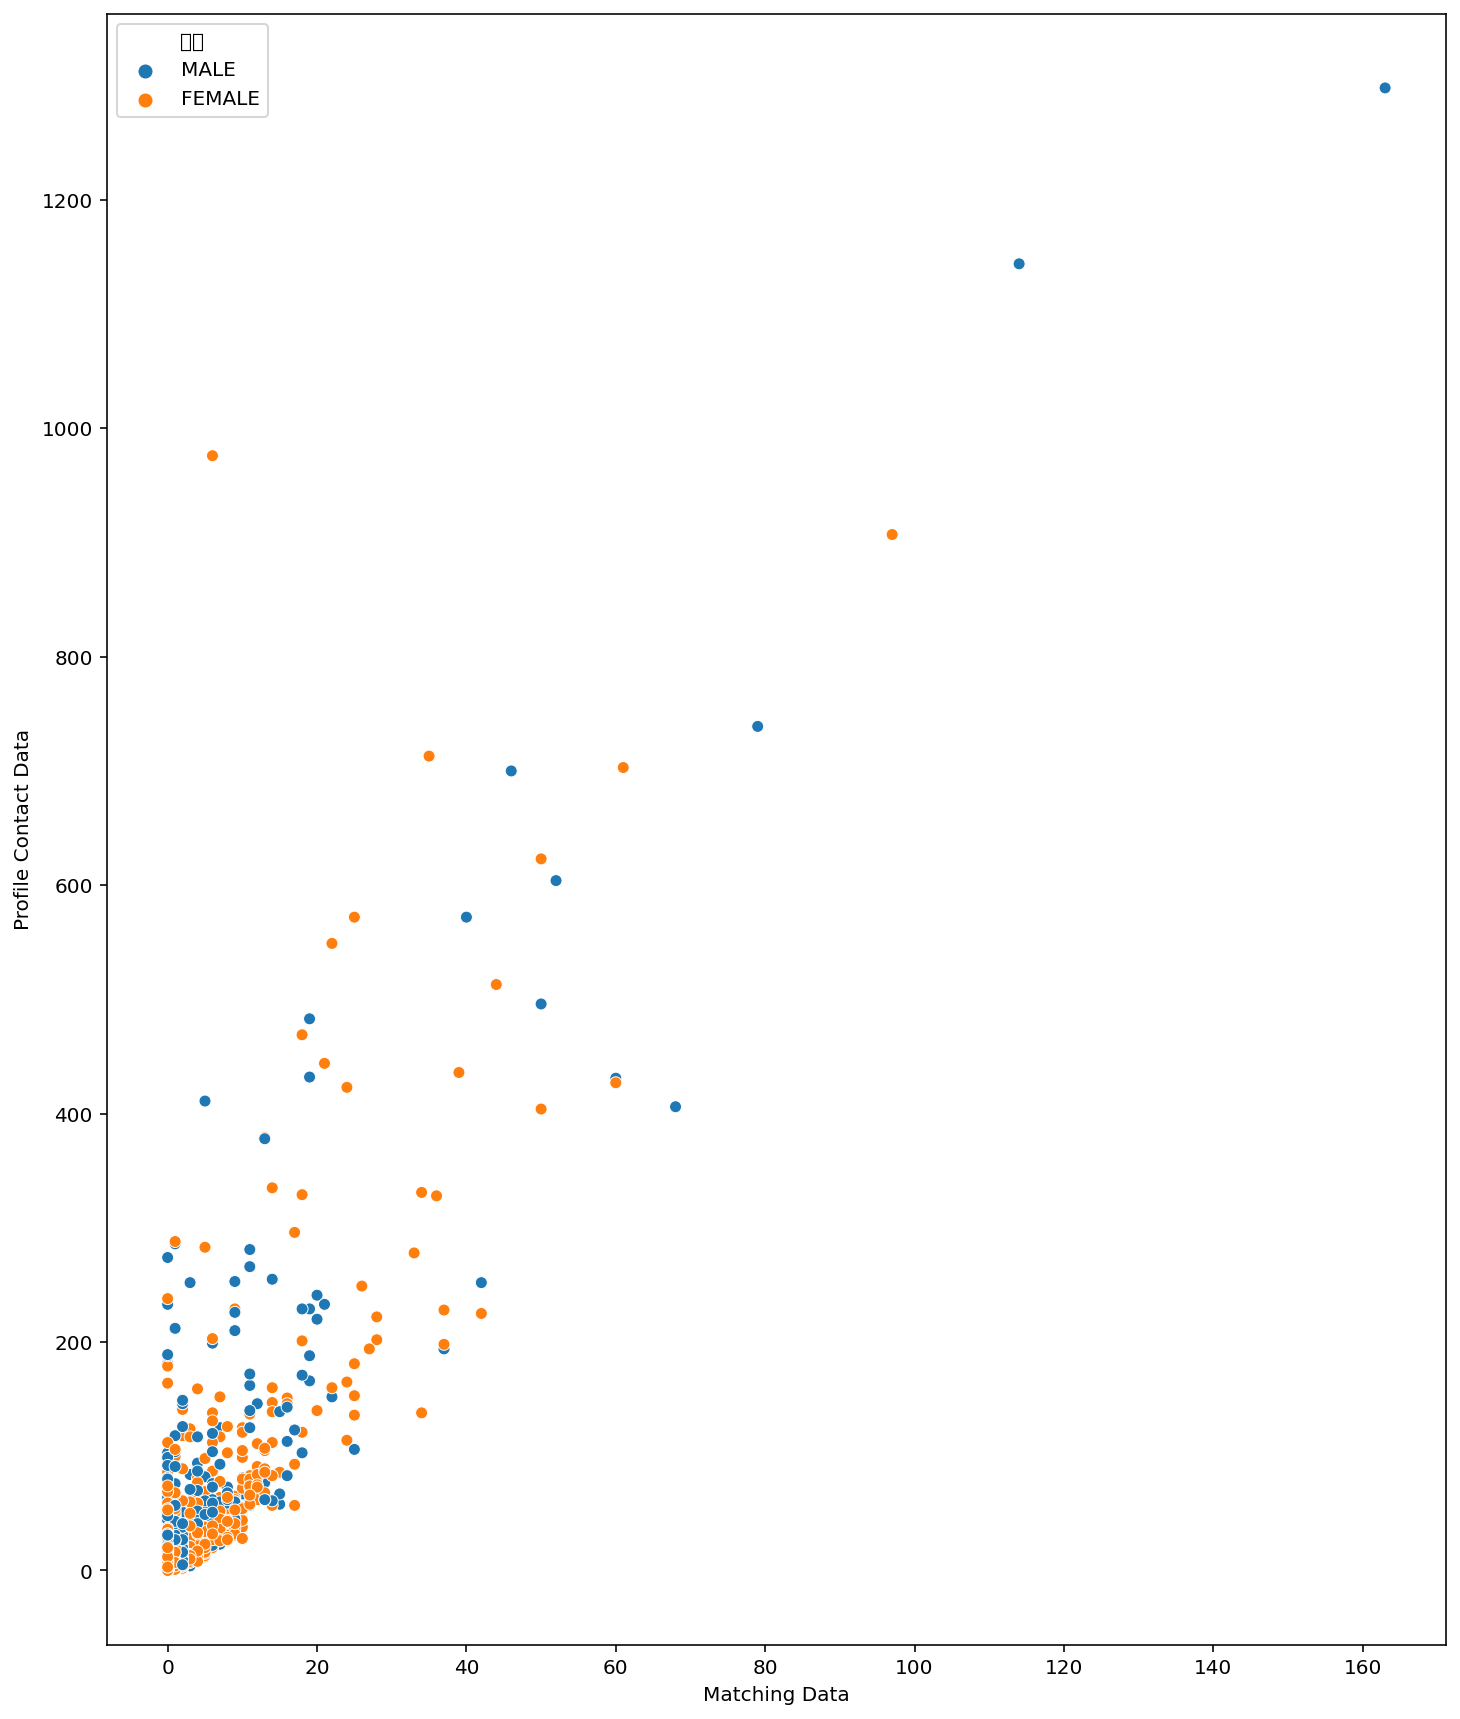

In [ ]:
plt.figure(figsize=(12,15)) #사이즈 단위는 inch
sns.scatterplot(x=per_nation_df['채팅성사 건수'],y=per_nation_df['상대방 프로필 조회 수'], hue=per_nation_df['성별'])
plt.xlabel('Matching Data')
plt.ylabel('Profile Contact Data')

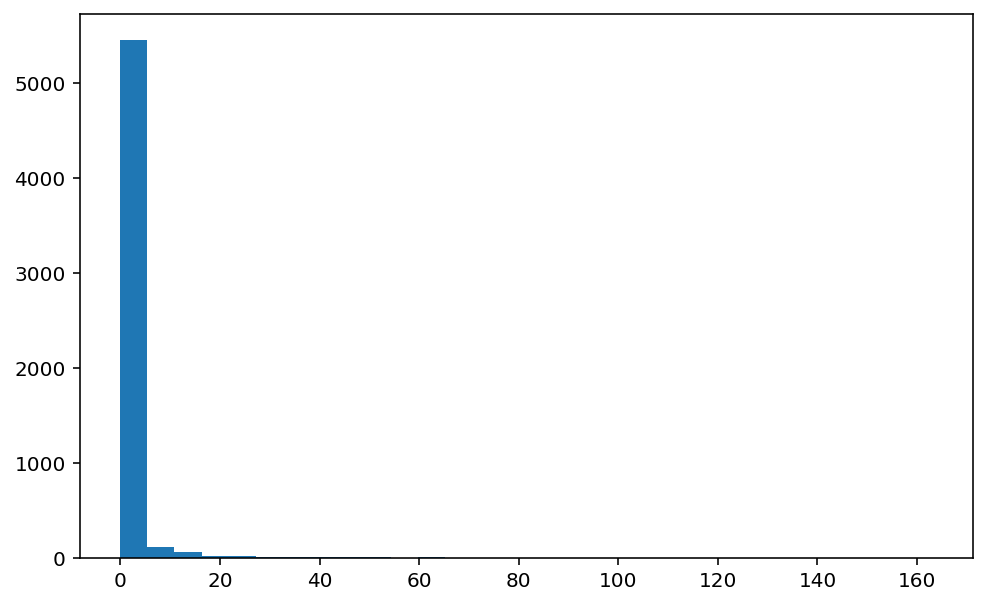

In [ ]:
# 이상치 ??
plt.hist(per_nation_df['채팅성사 건수'],bins=30) #bins = 10
plt.show()

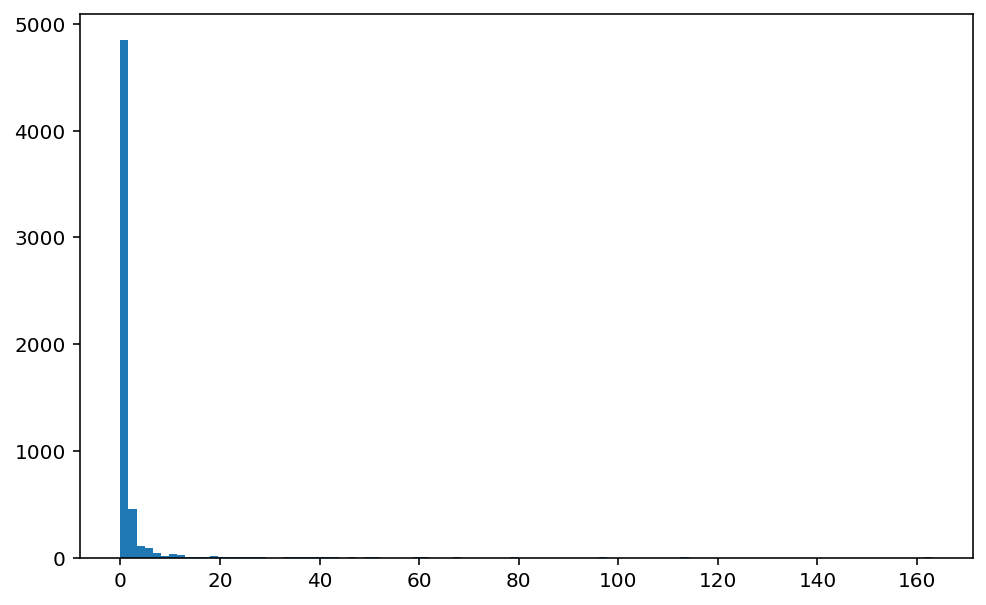

In [ ]:
# 이상치 ??
plt.hist(per_nation_df['채팅성사 건수'],bins=100) #bins = 10
plt.show()

(array([4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 4.400e+01, 7.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        4.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 1.600e+01, 0.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.960e+02,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 4.500e+01, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 3.200e+01, 1.600e+01, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        1.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.100e+01,
        3.000e+00, 0.000e+00, 2.100e+01, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 5.000e+00, 4.100e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.900e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        7.000e+00, 5.000e+00, 1.000e+0

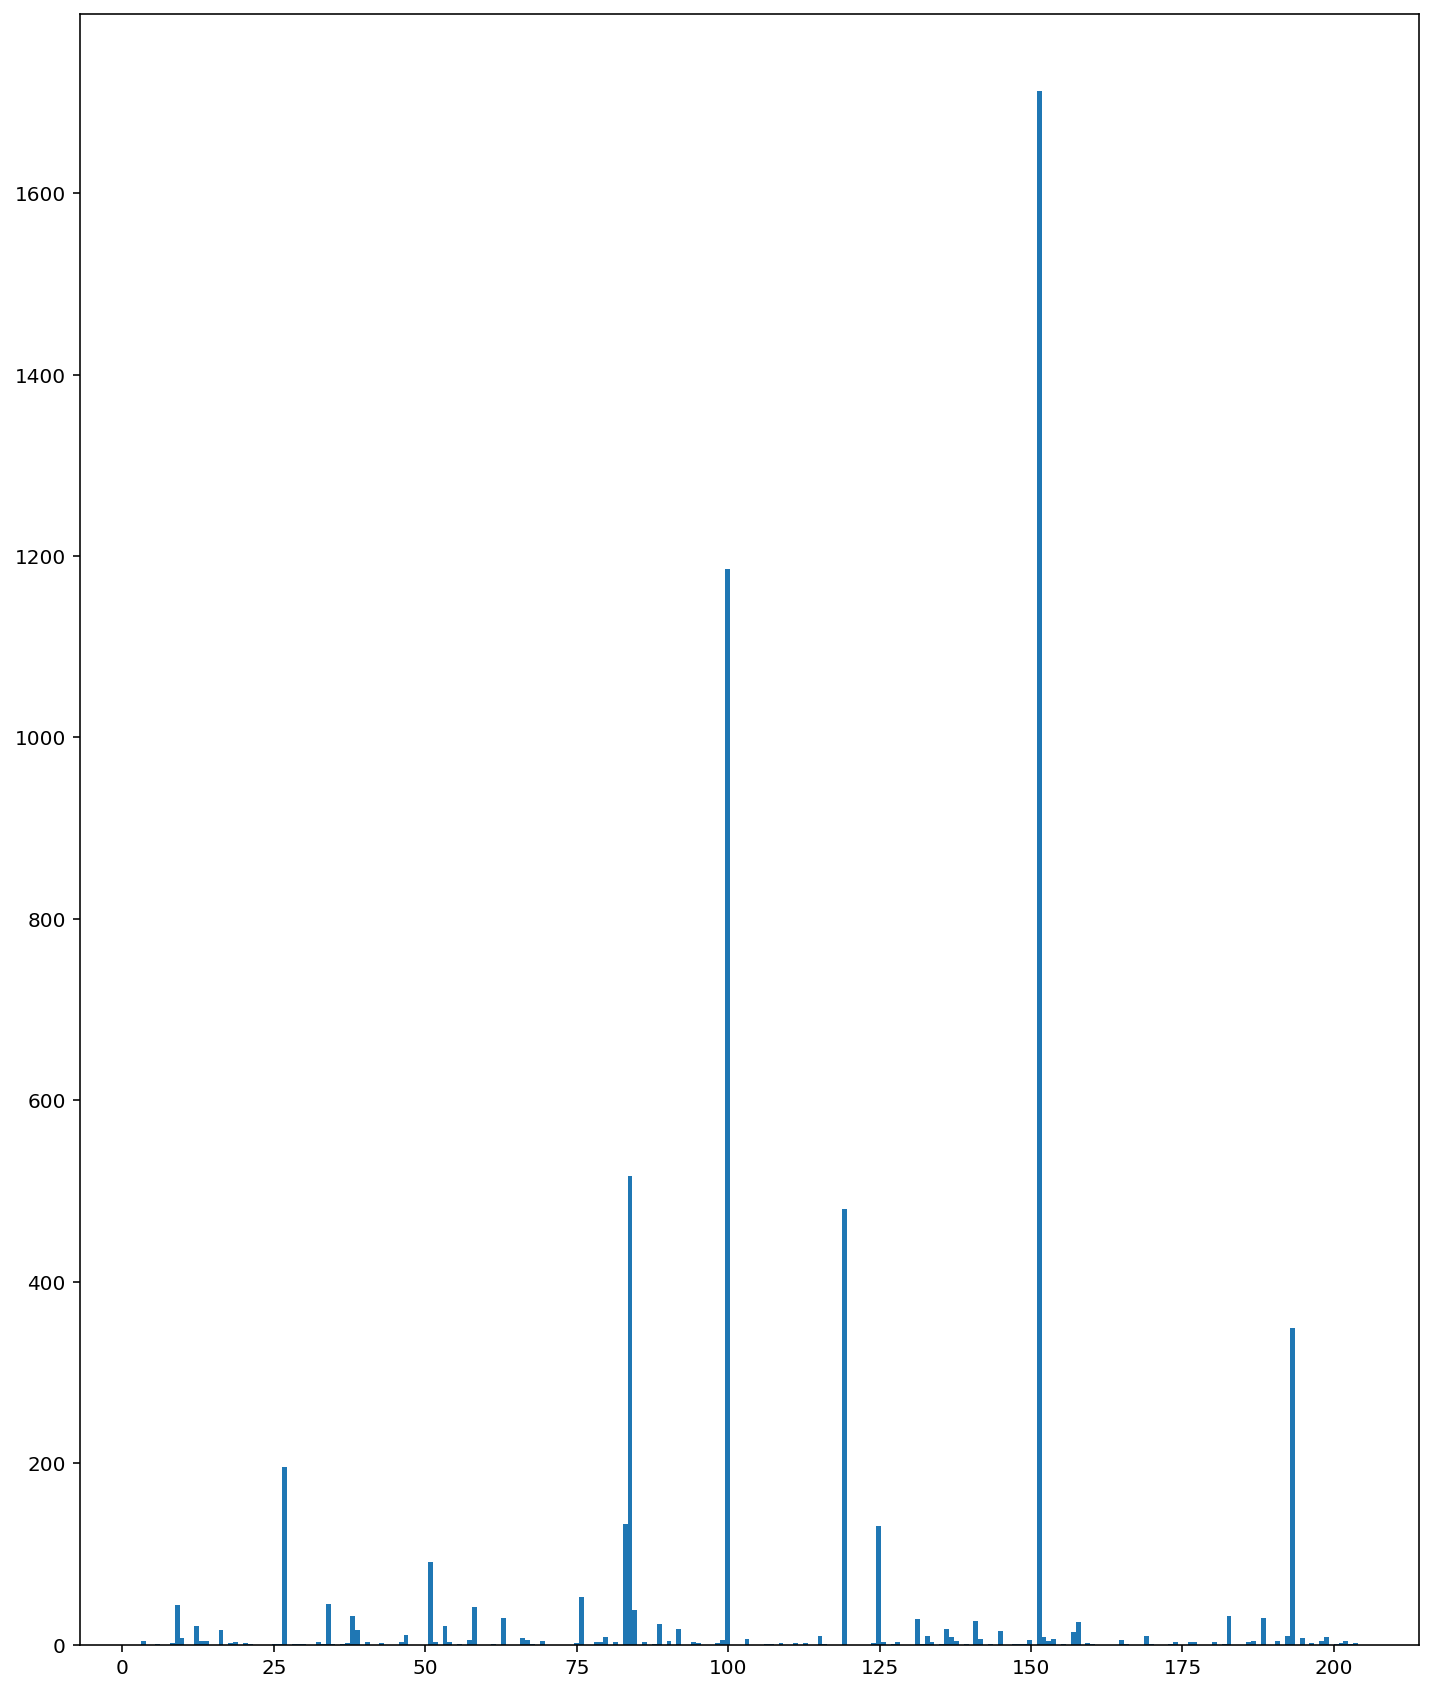

In [ ]:
plt.figure(figsize=(12,15)) #사이즈 단위는 inch
plt.hist(per_nation_df['국적코드'],bins=250) #bins = 10

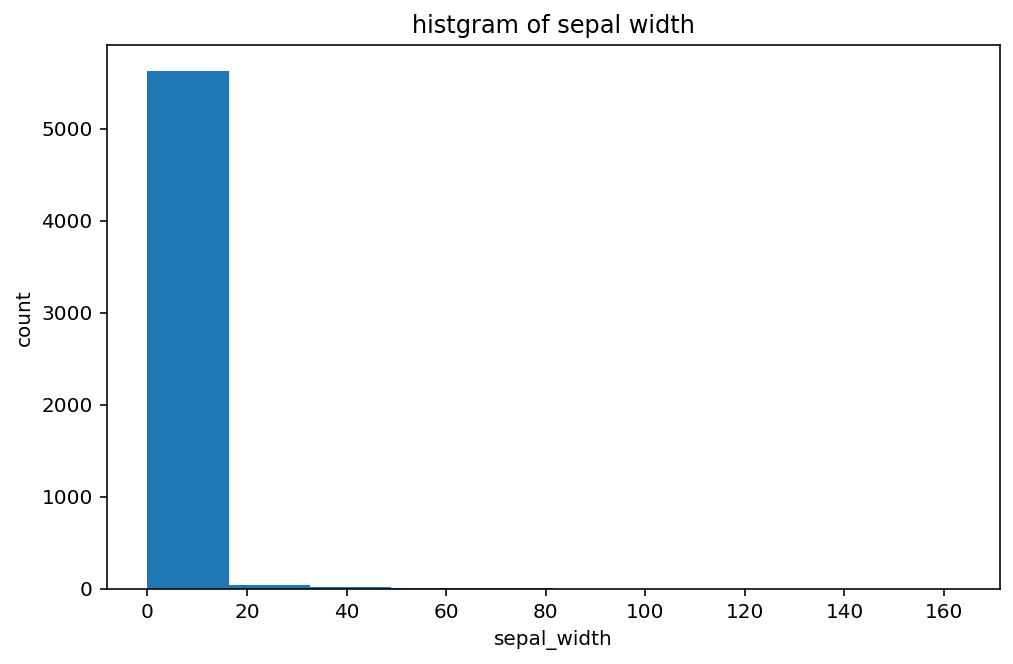

In [ ]:
plt.hist(per_nation_df['채팅성사 건수'])
plt.xlabel('sepal_width')
plt.ylabel('count')
plt.title('histgram of sepal width')
plt.show()

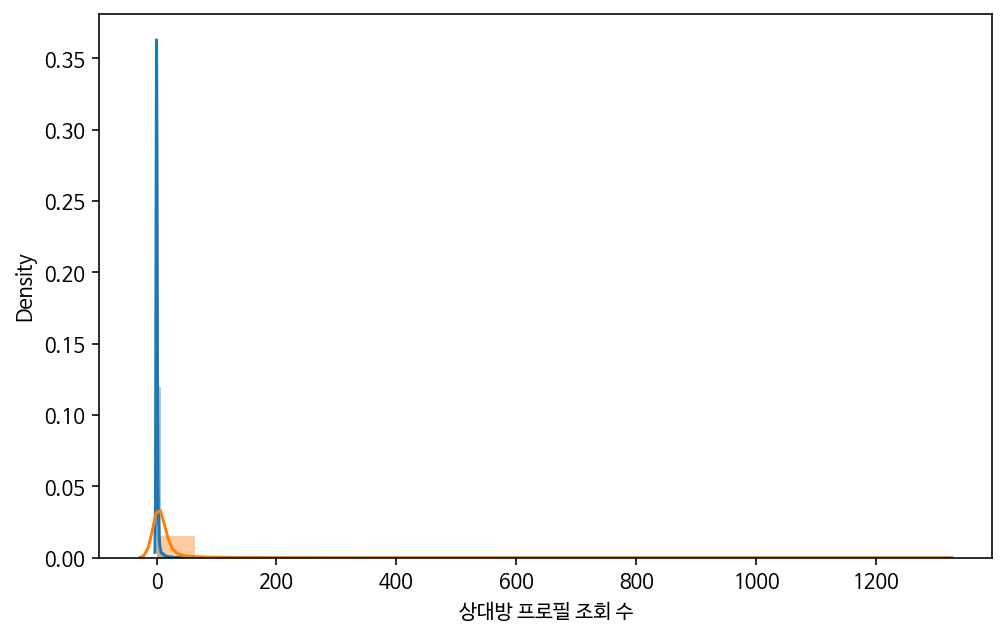

In [ ]:
sns.distplot(per_nation_df['채팅성사 건수'], bins=20)
sns.distplot(per_nation_df['상대방 프로필 조회 수'], bins=20)
plt.show()

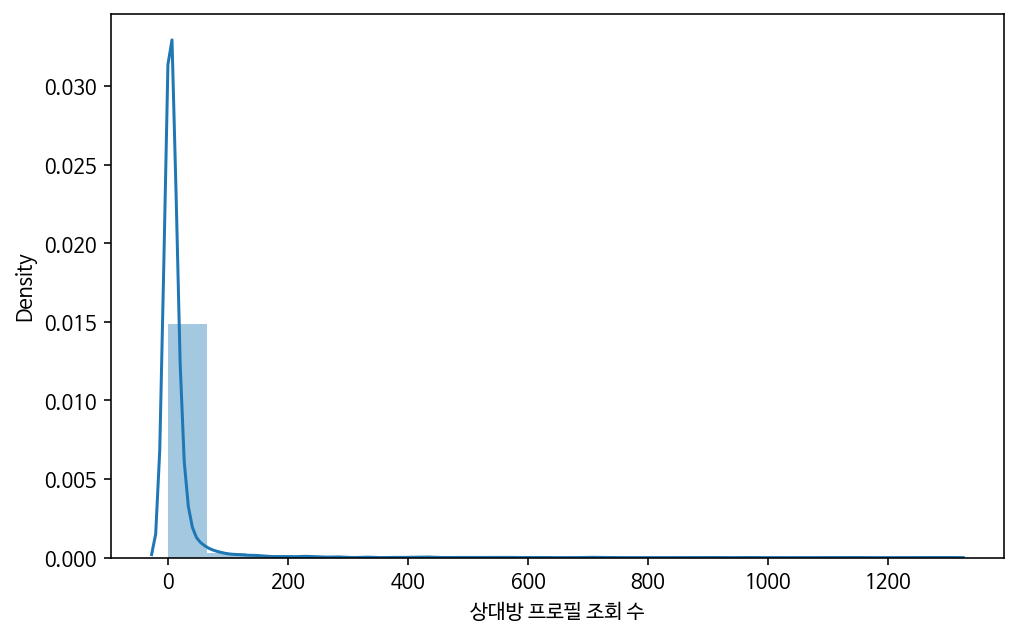

In [ ]:
sns.distplot(per_nation_df['상대방 프로필 조회 수'], bins=20)
plt.show()

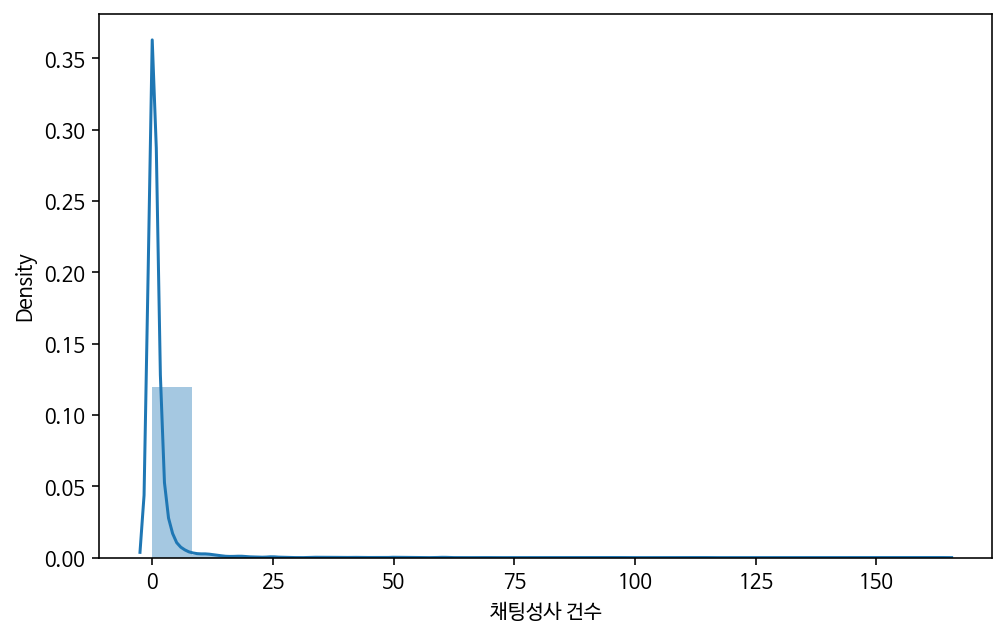

In [ ]:
sns.distplot(per_nation_df['채팅성사 건수'], bins=20)
plt.show()

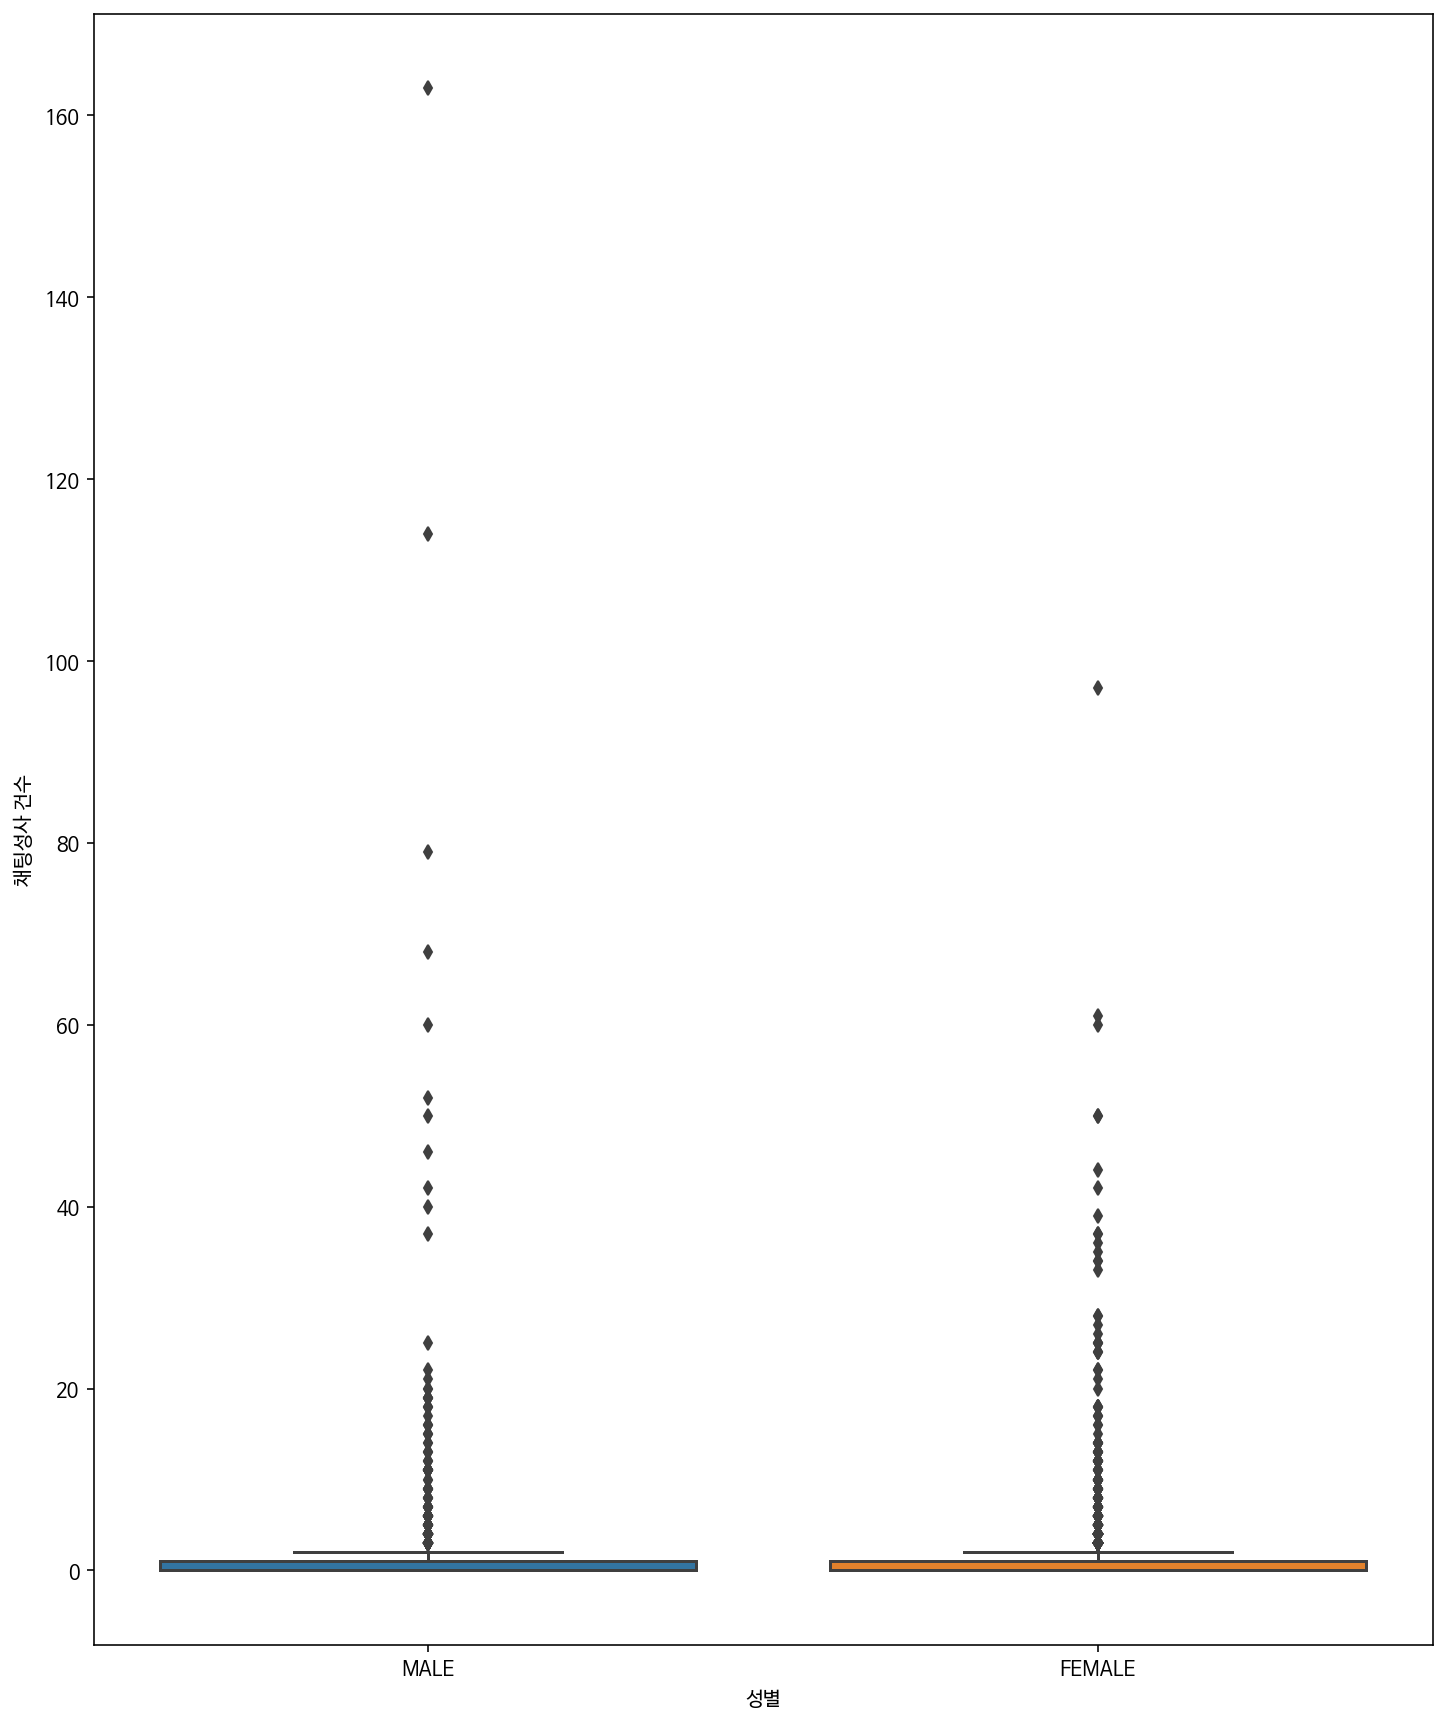

In [ ]:
plt.figure(figsize=(12,15)) #사이즈 단위는 inch
sns.boxplot(x=per_nation_df['성별'],y=per_nation_df['채팅성사 건수'])
plt.show()

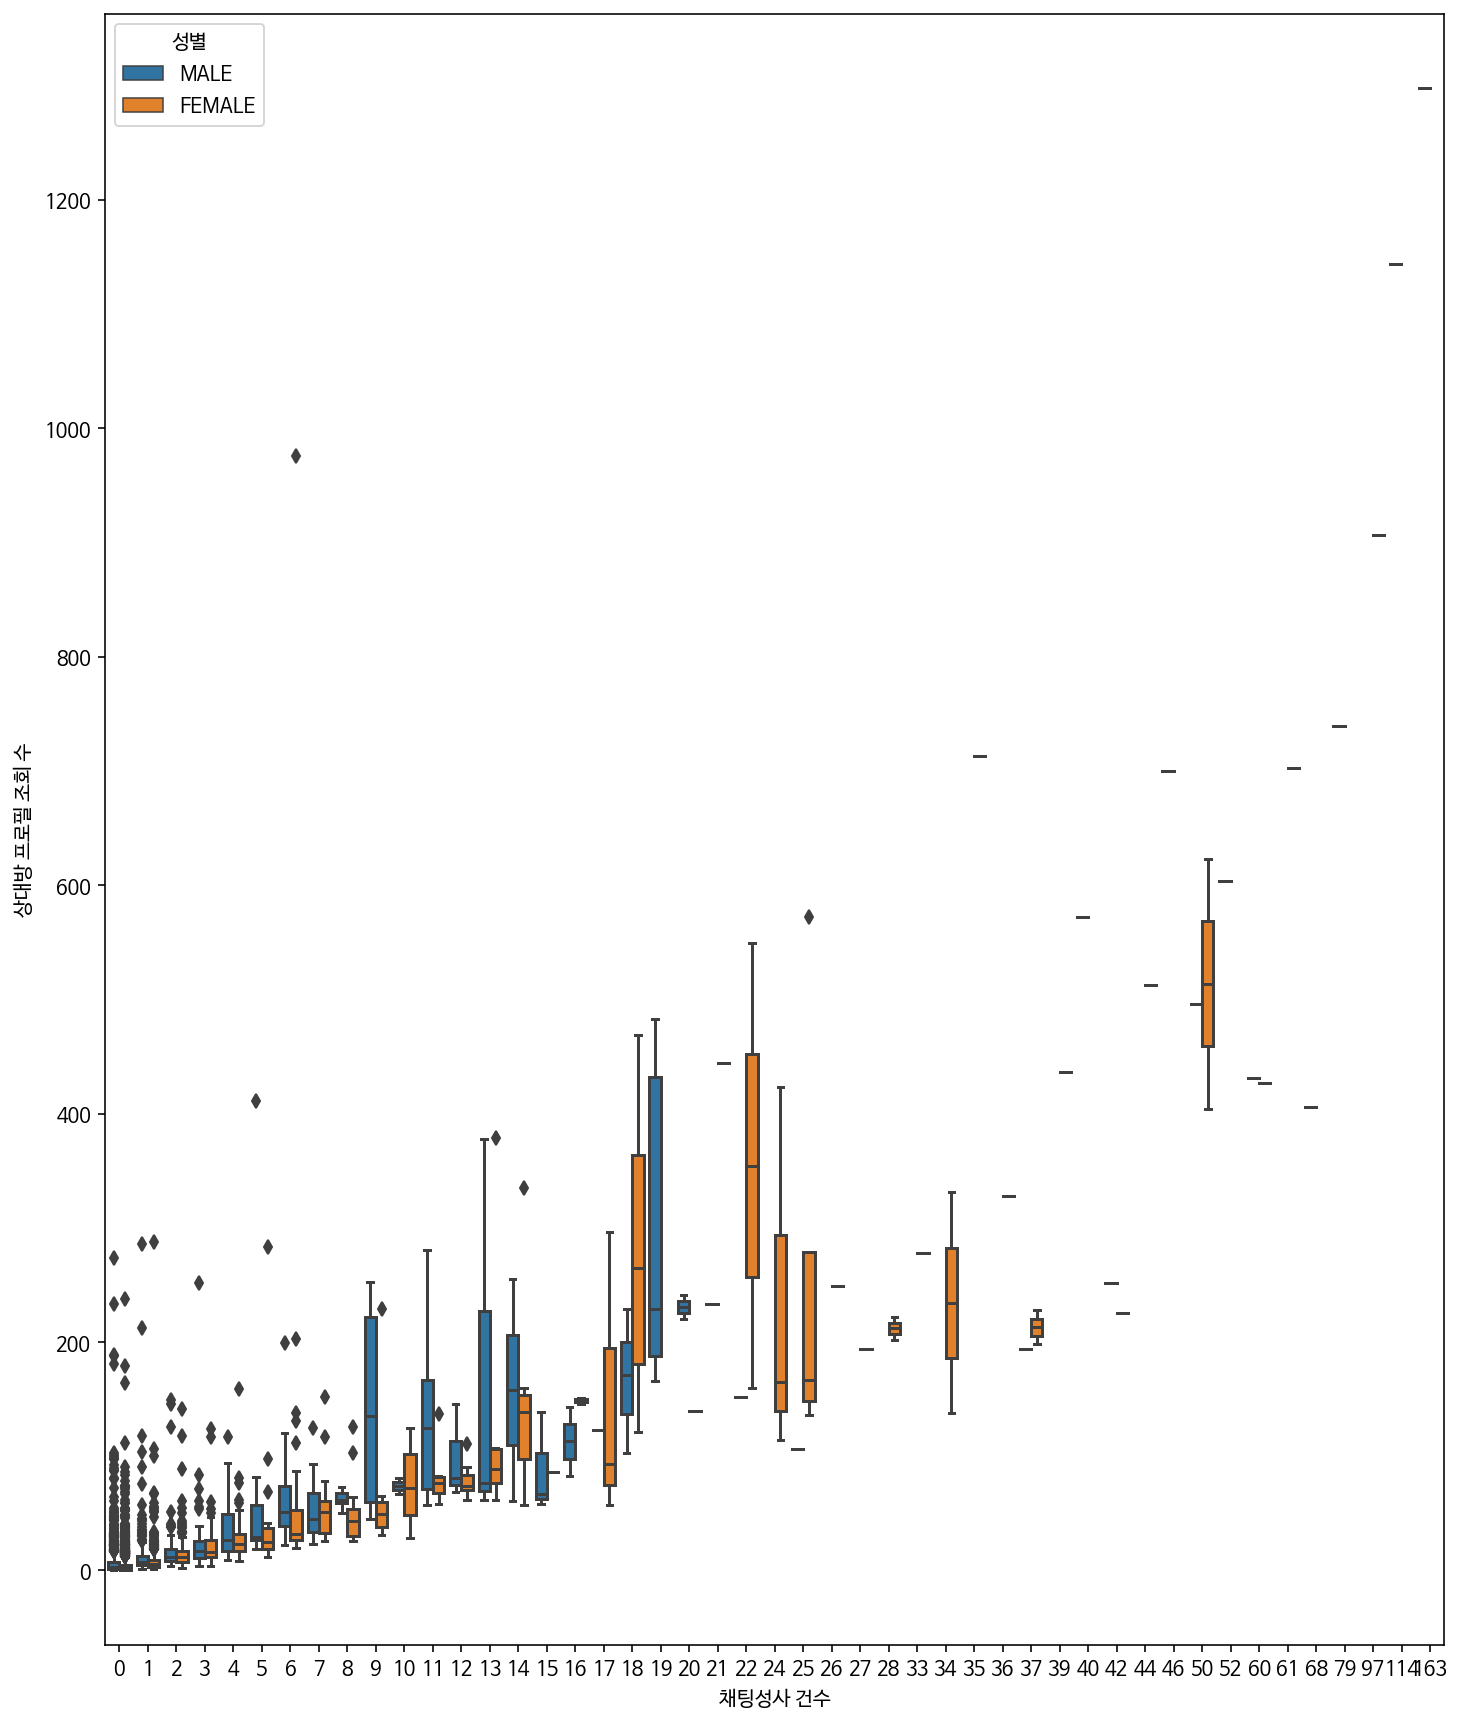

In [ ]:
plt.figure(figsize=(12,15)) #사이즈 단위는 inch

sns.boxplot(x=per_nation_df['채팅성사 건수'],y=per_nation_df['상대방 프로필 조회 수'], hue=per_nation_df['성별'])
plt.show()

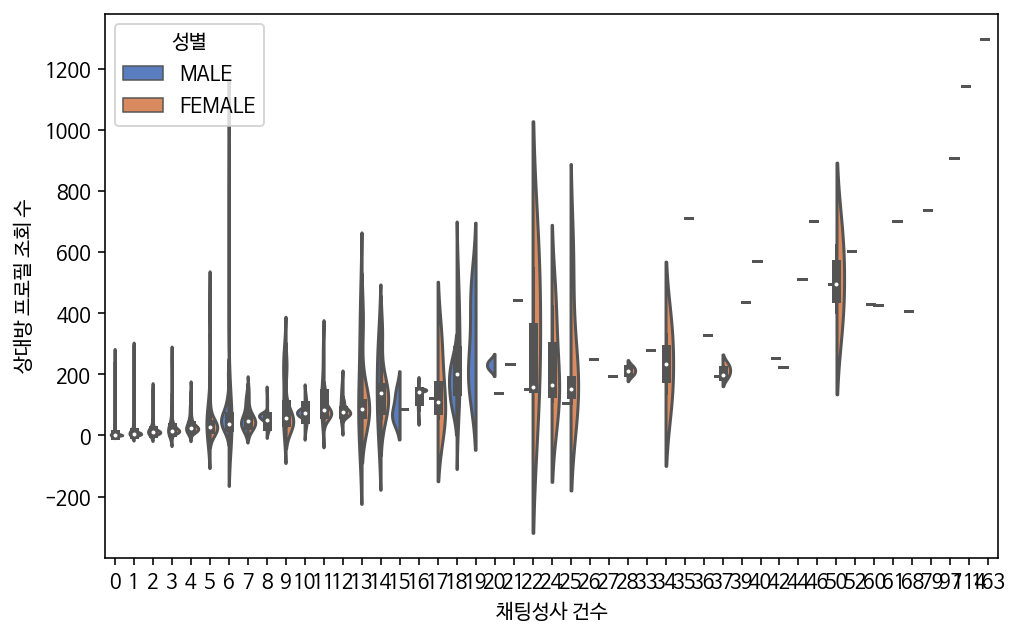

In [ ]:
sns.violinplot(x=per_nation_df['채팅성사 건수'],y=per_nation_df['상대방 프로필 조회 수'], hue=per_nation_df['성별'], palette="muted", split=True)
plt.show()

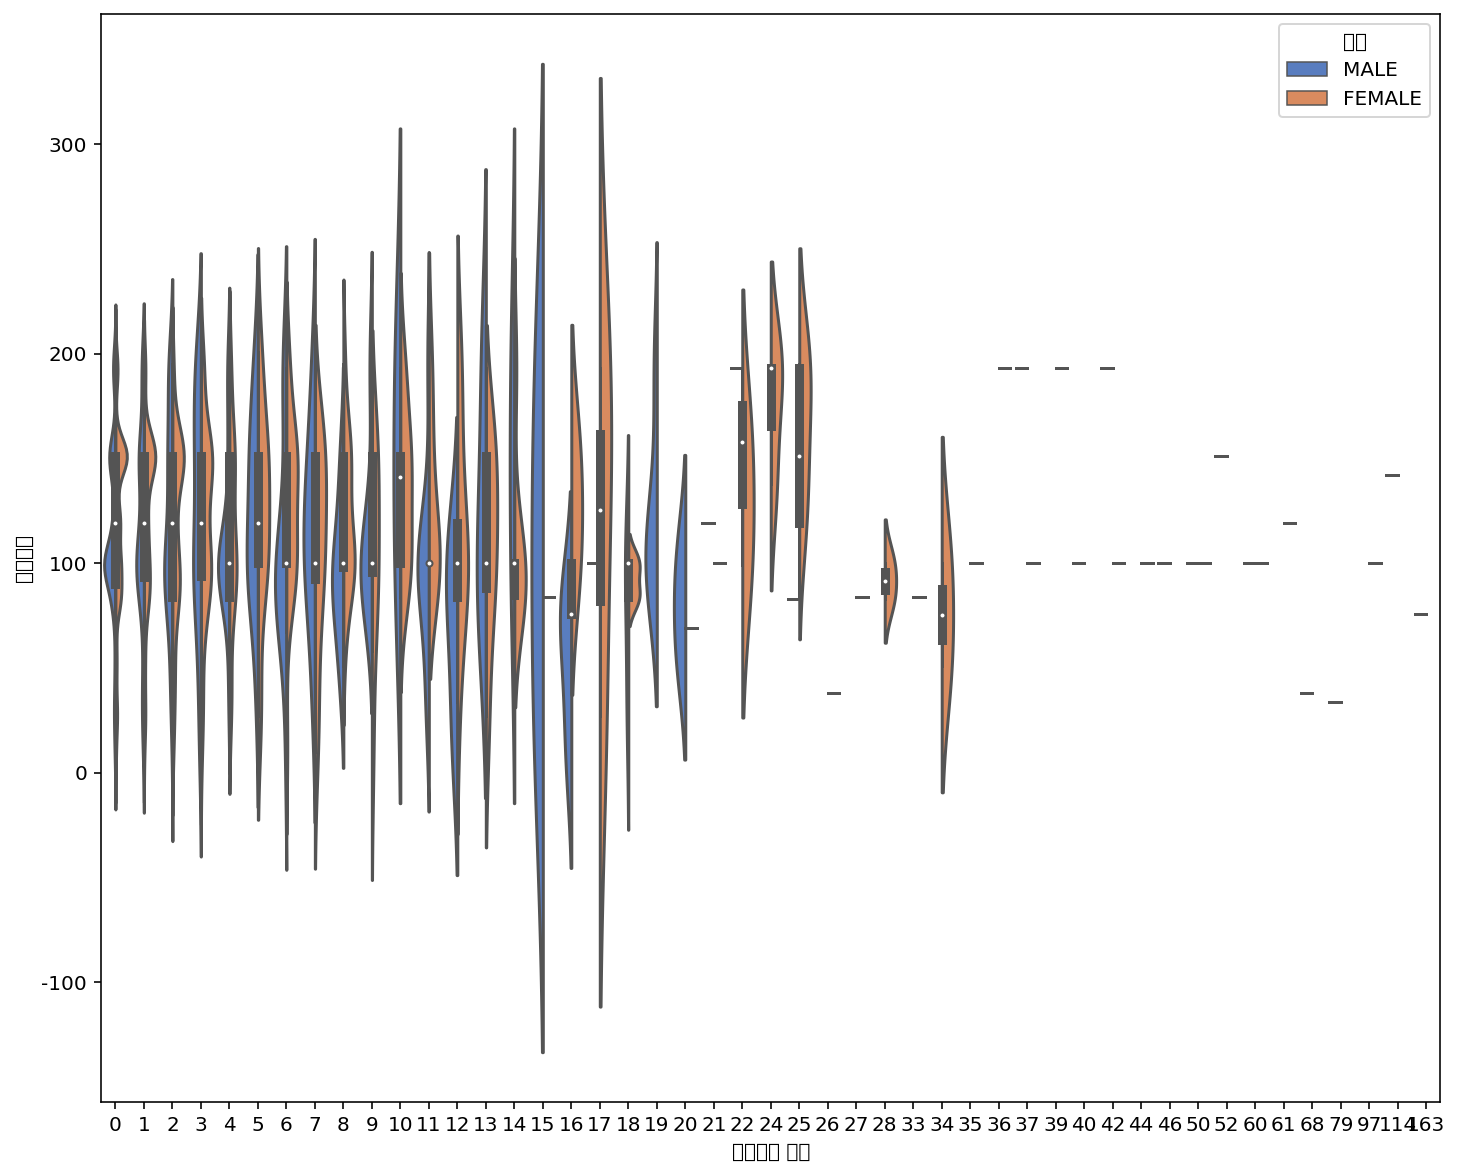

In [ ]:
plt.figure(figsize=(12,10)) #사이즈 단위는 inch
sns.violinplot(x=per_nation_df['채팅성사 건수'],y=per_nation_df['국적코드'], hue=per_nation_df['성별'], palette="muted", split=True)
plt.show()

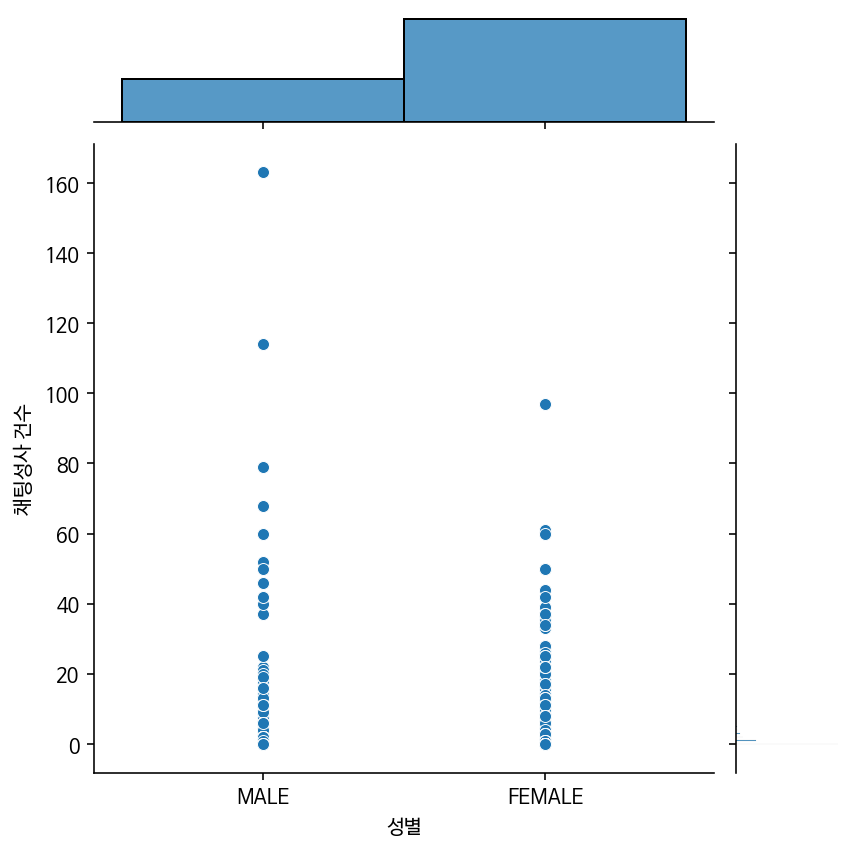

In [ ]:
sns.jointplot(x=per_nation_df['성별'], y=per_nation_df['채팅성사 건수'])
plt.show()

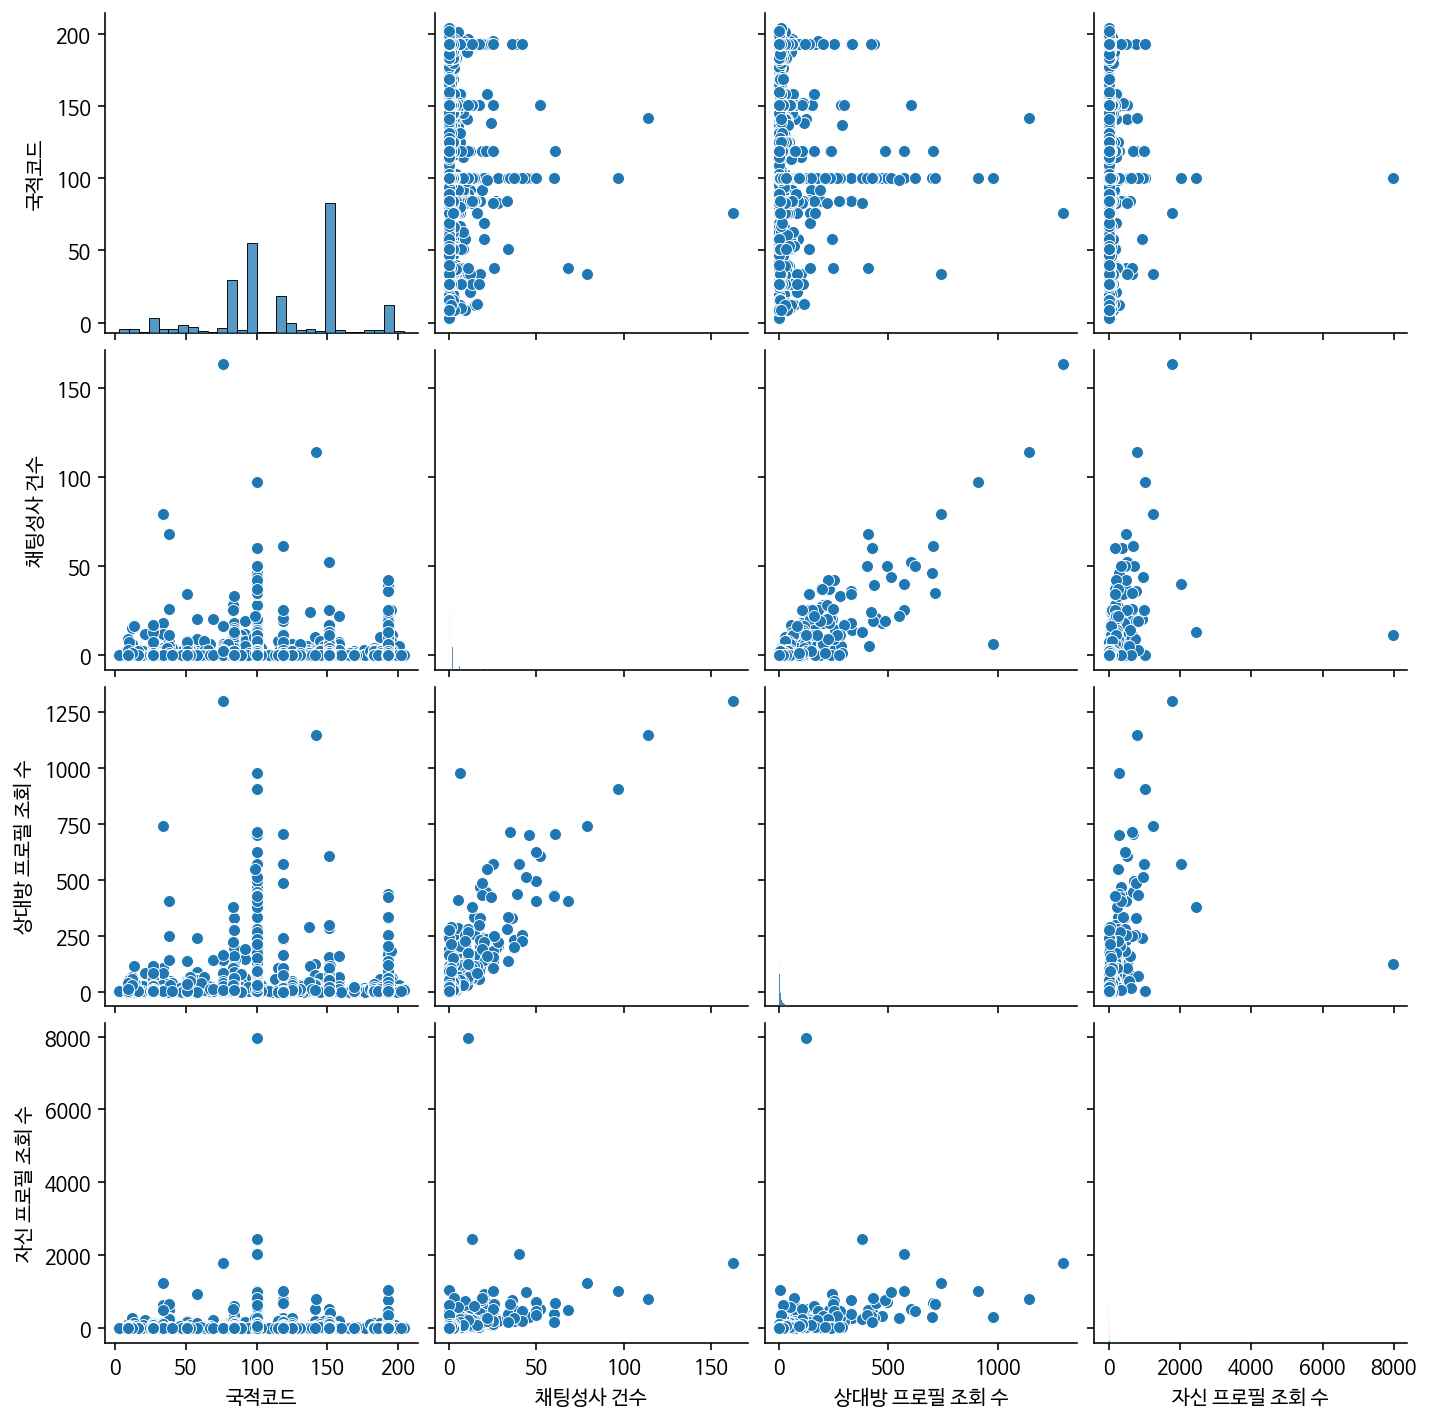

In [ ]:
sns.pairplot(per_nation_df, diag_kind='hist')
plt.show()

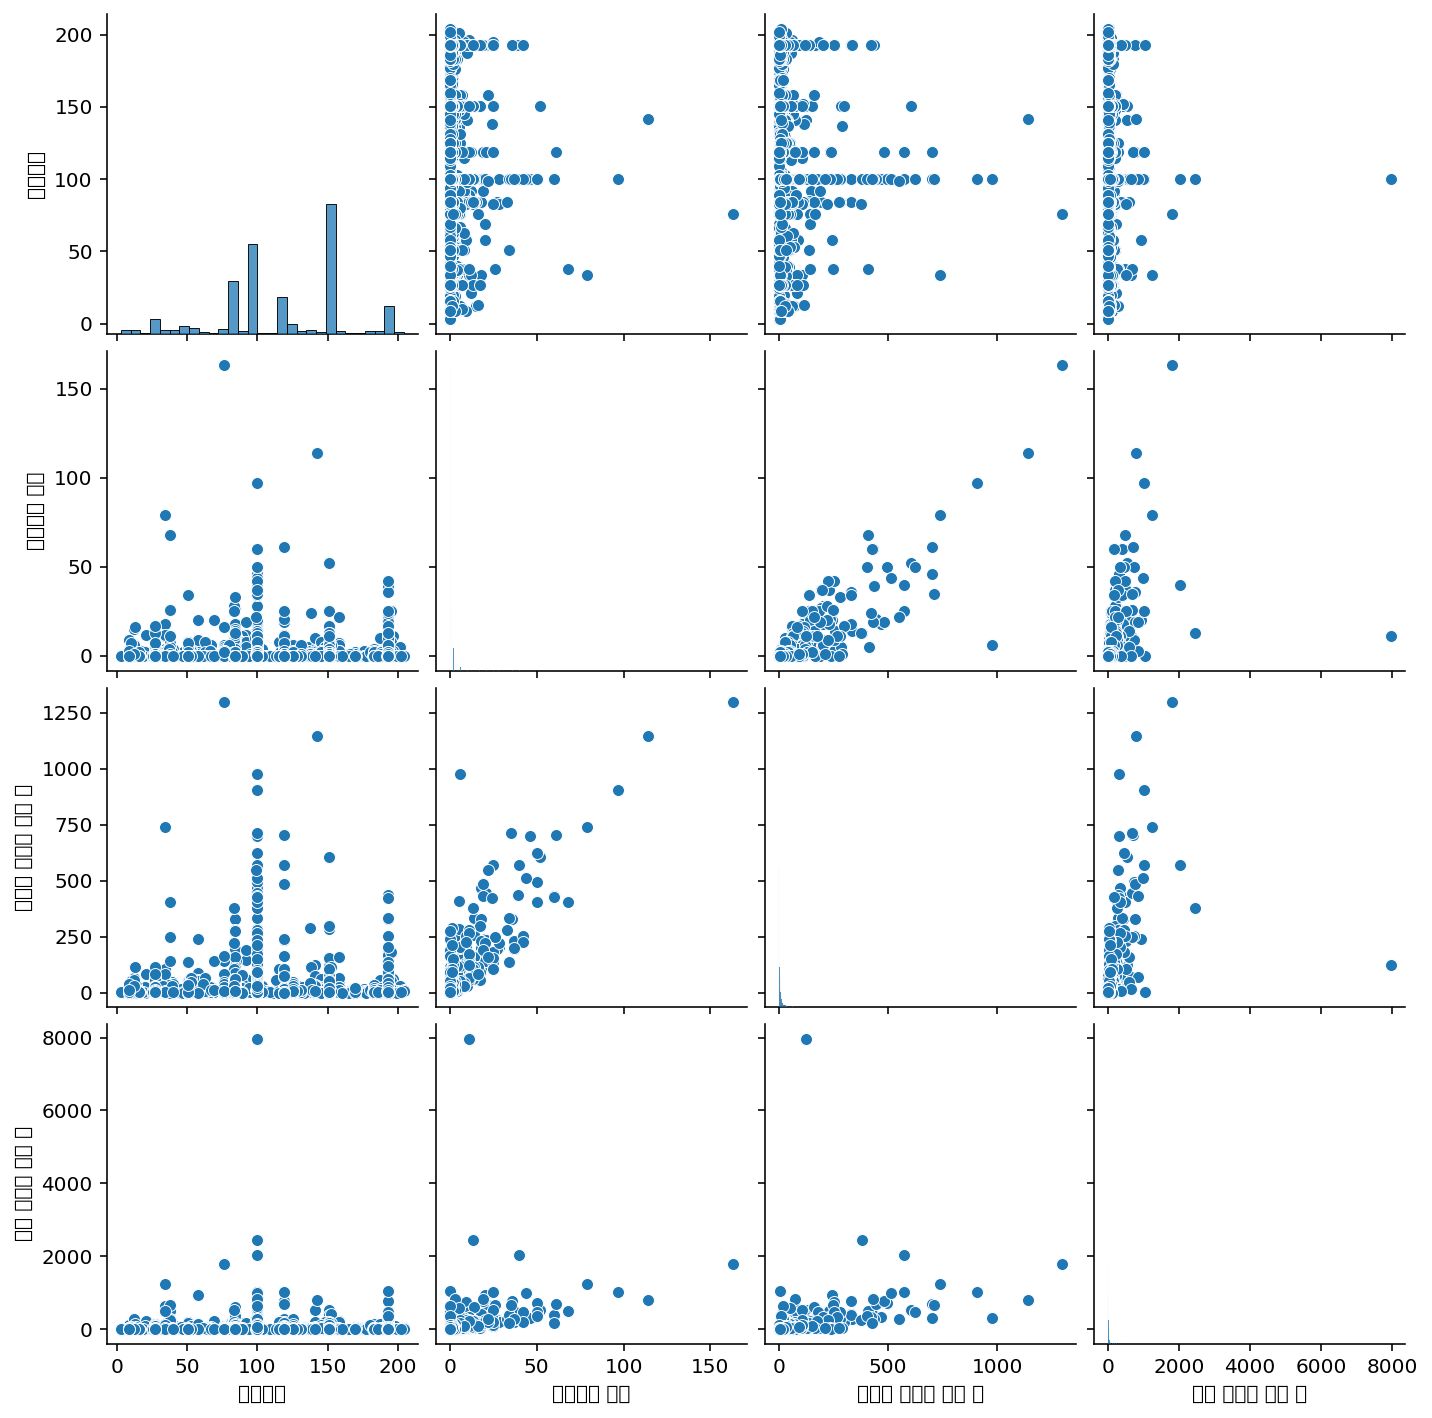

In [ ]:
sns.pairplot(per_nation_df, diag_kind='hist')
plt.show()

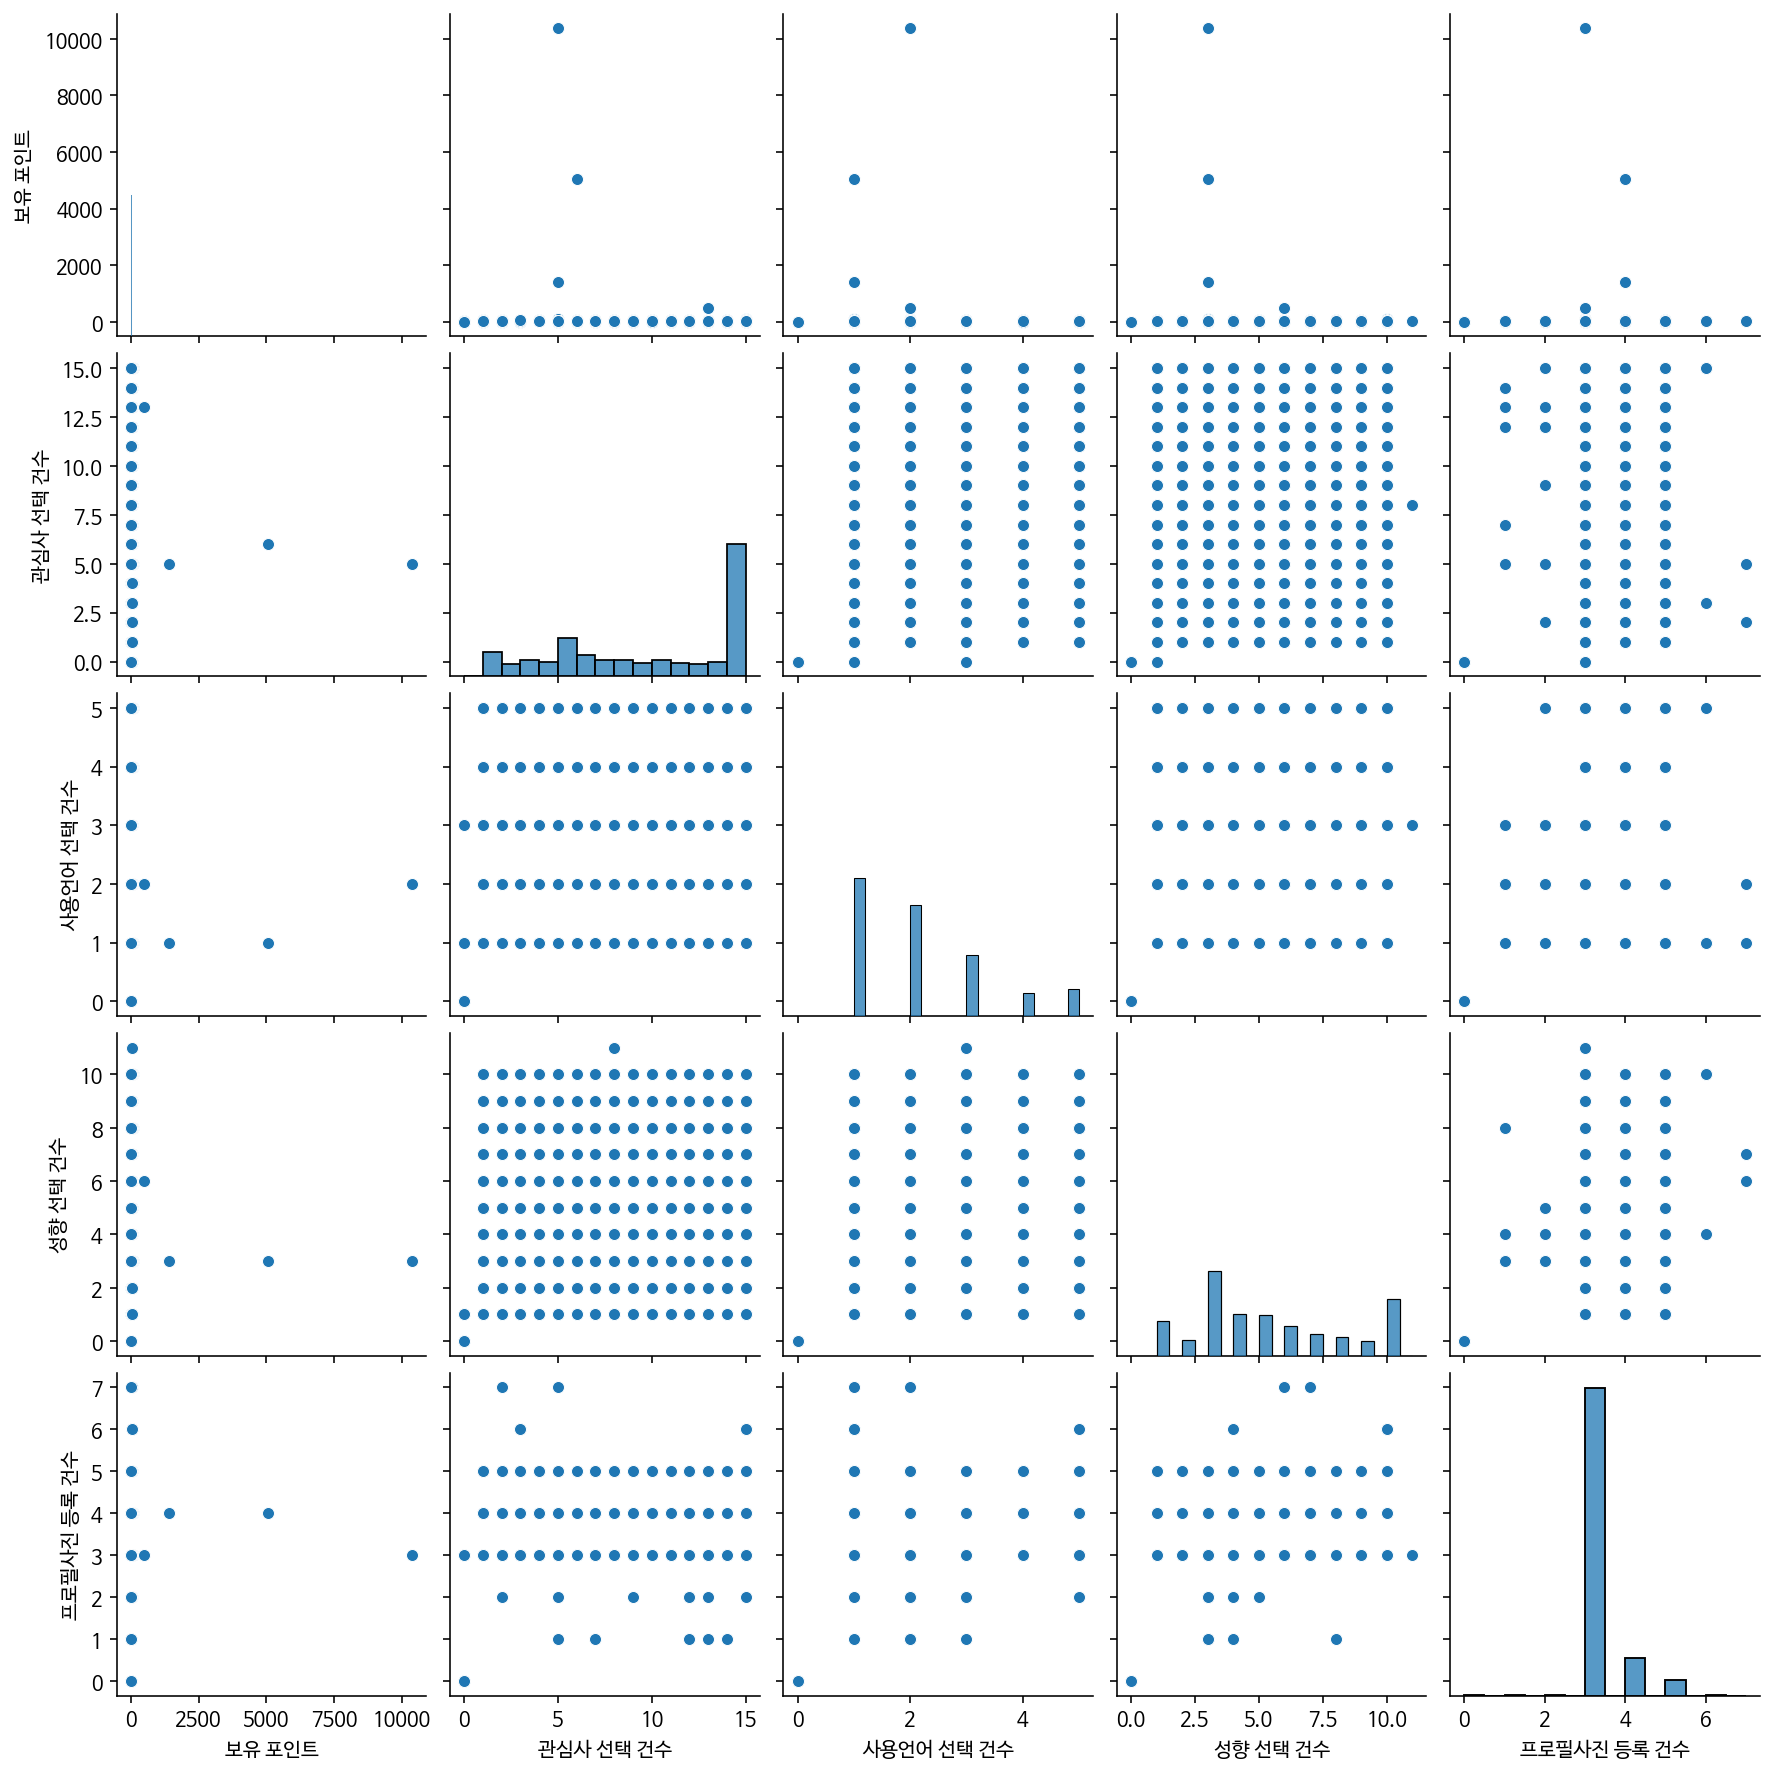

In [ ]:
sns.pairplot(per_profile_df, diag_kind='hist')
plt.show()

In [ ]:
sns.pairplot(per_nation_df, diag_kind='hist')
plt.show()

#### Reference
  - Seaborn으로 대체 에정

#  **2. Data Preprocessing**



### 2.1 per_nation_df 데이터 전처리

In [ ]:
#기본정보확인,
per_nation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689 entries, 0 to 5688
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   국적코드          5687 non-null   float64
 1   국적            5687 non-null   object 
 2   성별            5689 non-null   object 
 3   채팅성사 건수       5689 non-null   int64  
 4   상대방 프로필 조회 수  5689 non-null   int64  
 5   자신 프로필 조회 수   5689 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 266.8+ KB


In [ ]:
#국적 요인 확인
per_nation_df['국적'].unique()

#성별은 남성과 여성만 있으므로 별도의 확인 과정 불필요

array(['미국', '스페인', '영국', '나미비아공화국', '대한민국', '말레이시아', '필리핀', '인도네시아',
       '영국령 버진아일랜드', '오스트레일리아', '트리니다드 토바고', '홍콩', '인도', '태국', '캐나다',
       '독일', '일본', '브라질', '멕시코', '오스트리아', '아랍에미리트', '프랑스', '이란', '아르헨티나',
       '모로코', '러시아', '케냐', '알바니아', '알제리', '리비야', '방글라데시', '몰도바', '스리랑카',
       '이탈리아', '루마니아', '나이지리아', '시리아', '우간다', '가나 공화국', '중국', '네덜란드',
       '캄보디아', '이집트', '남아프리카공화국', '네팔', '에티오피아', '우즈베키스탄', '레바논',
       '리베리아 공화국', '이라크', '리투아니아', '수단', '모나코', '사우디아라비아', '요르단', '조지아',
       '싱가포르', '우크라이나', '그리스', '마케도니아공화국', '미얀마', '터키', '콜롬비아', '아이티',
       '뉴질랜드', '파라과이', '팔레스타인', '페루', '파키스탄', '베트남', '튀니지', '잠비아', '욘두라스',
       '소말리아', '오만', '아제르바이잔', '에콰도르', '르완다', '푸에르토리코', '벨라루스',
       '중앙 아프리카 공화국', '바하마', '노르웨이', '북한', '체코', '타이완', '스웨덴', '모리셔스',
       '폴란드', '헝가리', '아일랜드', '벨리즈', '베네수엘라', '과테말라 공화국', '브루나이', '아르메니아',
       '코스타리카', '사모아', '이스라엘', '엘살바도르', '벨기에', '첼레', '에스토니아', '라트비아',
       '카보베르데', '예멘', '파나마', '베냉', '몽골', '불가리아', '포루투갈', '짐바브웨', '지브롤터',
      

In [ ]:
# 국적별 분포도 확인
per_nation_df['국적'].value_counts()

필리핀      1712
대한민국     1186
인도네시아     517
말레이시아     480
미국        349
         ... 
카보베르데       1
레바논         1
파나마         1
베냉          1
세르비아        1
Name: 국적, Length: 129, dtype: int64

In [ ]:
#성별 분포도 확인
print(per_nation_df['성별'].value_counts())

FEMALE    4008
MALE      1681
Name: 성별, dtype: int64


- 여성 회원 수가 남성보다 2.3배 이상 높음
- 여성 회원 대비 남성 회원의 영역별 38%~ 67% 이상 높은 극적인 앱 사용 활동 확인됌
> - 성별에 따른 차등점수제 또는 활동 점수에 대한 차등점수제에 대한 실험 필요
- 국적 코드 정보는 무시할 것 (일부 나라에서 유의미한 모집단이 생성되지 않았다고 판단)

In [ ]:
per_nation_df.groupby(['국적']).mean()

,국적코드,채팅성사 건수,상대방 프로필 조회 수,자신 프로필 조회 수
국적,,,,
가나 공화국,67.0,1.200000,8.600000,26.800000
과테말라 공화국,75.0,0.000000,9.000000,15.000000
그리스,69.0,5.000000,39.000000,57.500000
나미비아공화국,135.0,0.000000,4.000000,0.000000
나이지리아,141.0,1.038462,18.115385,46.038462
...,...,...,...,...
프랑스,63.0,0.655172,7.068966,13.620690
피지,61.0,0.000000,38.000000,22.000000
필리핀,151.0,0.639019,6.929322,13.019276


In [ ]:
per_nation_df.groupby(['성별']).mean()

,국적코드,채팅성사 건수,상대방 프로필 조회 수,자신 프로필 조회 수
성별,,,,
FEMALE,118.894185,0.991517,11.810629,20.097555
MALE,113.617262,1.374777,19.672219,36.673409


#### Reference

In [ ]:
# 상위 파라미터 확인
per_nation_df_U5 = per_nation_df.head(5)
print(per_nation_df_U5)

    국적코드       국적      성별  채팅성사 건수  상대방 프로필 조회 수  자신 프로필 조회 수
0  193.0       미국    MALE        1             7           15
1   58.0      스페인  FEMALE        0             4            2
2   76.0       영국    MALE        0             1            2
3  135.0  나미비아공화국  FEMALE        0             4            0
4  100.0     대한민국    MALE        0            22           40


In [ ]:
per_nation_df_U10 = per_nation_df.head(10)
print(per_nation_df_U10)

    국적코드       국적      성별  채팅성사 건수  상대방 프로필 조회 수  자신 프로필 조회 수
0  193.0       미국    MALE        1             7           15
1   58.0      스페인  FEMALE        0             4            2
2   76.0       영국    MALE        0             1            2
3  135.0  나미비아공화국  FEMALE        0             4            0
4  100.0     대한민국    MALE        0            22           40
5  119.0    말레이시아    MALE        1             8           10
6  100.0     대한민국  FEMALE        0            14            4
7  151.0      필리핀  FEMALE        0             0            5
8  151.0      필리핀  FEMALE        0             4           41
9   84.0    인도네시아  FEMALE        0             5            3


In [ ]:
# 변수형에 따른 연산 불가
per_nation_df_U10 - per_nation_df_U5

TypeError: ignored

### 2.2 Base_Data_df 데이터 전처리

In [ ]:
#기본정보확인,
Base_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   국적              1400 non-null   object 
 1   strInterest1    1400 non-null   int64  
 2   strInterest2    1224 non-null   float64
 3   strInterest3    1145 non-null   float64
 4   strInterest4    1036 non-null   float64
 5   strInterest5    932 non-null    float64
 6   strInterest6    847 non-null    float64
 7   strInterest7    779 non-null    float64
 8   strInterest8    724 non-null    float64
 9   strInterest9    658 non-null    float64
 10  strInterest10   617 non-null    float64
 11  strInterest11   555 non-null    float64
 12  strInterest12   501 non-null    float64
 13  strInterest13   463 non-null    float64
 14  strInterest14   419 non-null    float64
 15  strInterest15   361 non-null    float64
 16  strCharacter1   1400 non-null   int64  
 17  strCharacter2   1162 non-null   f

In [ ]:
# 흥미(취미), 성격, 언어 영역으로 나눠서 분석할 것

In [ ]:
# 참고용 오류 - 데이터 타입
print(Base_Data_df['strInterest1'].value_counts(sort=True)

SyntaxError: ignored

In [ ]:
 # TEST
 Base_Data_df['strCharacter1'].value_counts() + Base_Data_df['strCharacter2'].value_counts()

1       194.0
2       156.0
3        27.0
4        83.0
5       148.0
6       207.0
7       117.0
8       270.0
9       112.0
10      197.0
11       43.0
12       91.0
13       60.0
14       73.0
15       97.0
16      135.0
17.0      NaN
18       68.0
19       37.0
20       47.0
21      119.0
22       15.0
23       44.0
24       11.0
25.0      NaN
26       19.0
27       18.0
28        5.0
29       79.0
30       36.0
31       29.0
32       14.0
dtype: float64

In [ ]:
 Base_Data_df['strCharacter1'].value_counts()

8     177
1     136
6     115
10     94
2      92
5      83
16     75
7      61
4      56
21     56
9      53
15     51
12     42
29     39
18     38
13     33
14     31
11     26
23     23
20     21
3      20
30     16
19     15
31     10
32     10
27      9
26      8
24      5
22      4
28      1
Name: strCharacter1, dtype: int64

- interest data의 그룹화

In [ ]:
Int_num = 1
Base_Data_df_maxint = 0

while Int_num < 16 :
  df_str = str(Int_num)
  Base_Data_df_int = Base_Data_df['strInterest'+df_str].value_counts(sort=True,dropna=True)
  #Base_Data_df_char = Base_Data_df['strCharacter'+df_str].value_counts()
  Int_num = Int_num + 1
  Base_Data_df_maxint += Base_Data_df_int

#print(Base_Data_df_maxchar)
print(Base_Data_df_maxint)

32    NaN
1     NaN
33    NaN
96    NaN
2     NaN
       ..
80    NaN
144   NaN
22    NaN
146   NaN
75    NaN
Name: strInterest1, Length: 122, dtype: float64


- 오류값 확인용 코드

In [ ]:
Int_num = 1
Base_Data_df_maxint = 0

while Int_num < 5 :
  df_str = str(Int_num)
  Base_Data_df_int = Base_Data_df['strInterest'+df_str].value_counts(sort=True,dropna=True)
  #Base_Data_df_char = Base_Data_df['strCharacter'+df_str].value_counts()
  Int_num = Int_num + 1
  Base_Data_df_maxint += Base_Data_df_int

#print(Base_Data_df_maxchar)
print(Base_Data_df_maxint)


32       NaN
1      187.0
33     181.0
96     101.0
2      148.0
       ...  
80       NaN
144      NaN
22      15.0
146      NaN
75       7.0
Name: strInterest1, Length: 122, dtype: float64


In [ ]:
Base_Data_df_maxint.head(120)

32       NaN
1      187.0
33     181.0
96     101.0
2      148.0
       ...  
52       NaN
134      NaN
80       NaN
144      NaN
22      15.0
Name: strInterest1, Length: 120, dtype: float64

- character data의 그룹화

In [ ]:
Char_num = 1
Base_Data_df_maxchar = 0

while Char_num < 10 :
  df_str = str(Char_num)
  Base_Data_df_char = Base_Data_df['strCharacter'+df_str].value_counts(sort=True,dropna=True)
  #Base_Data_df_char = Base_Data_df['strCharacter'+df_str].value_counts()
  Char_num = Char_num + 1
  #출력 확인용
  #print(Base_Data_df_char)
  Base_Data_df_maxchar += Base_Data_df_char

#print(Base_Data_df_maxchar)
print(Base_Data_df_maxchar)

8     610.0
1     370.0
6     511.0
10    545.0
2     327.0
5     317.0
16    380.0
7     333.0
4     208.0
21    358.0
9     341.0
15    269.0
12    252.0
29    221.0
18    203.0
13    161.0
14    197.0
11    112.0
23    178.0
20    164.0
3      67.0
30    154.0
19    132.0
31    114.0
32      NaN
27     54.0
26     73.0
24     42.0
22      NaN
28      NaN
Name: strCharacter1, dtype: float64


- language data의 그룹화

In [ ]:
Lang_num = 1
Base_Data_df_maxlang = 0

while Lang_num < 6 :
  df_str = str(Lang_num)
  Base_Data_df_lang = Base_Data_df['strLangues'+df_str].value_counts(sort=True,dropna=True)
  #Base_Data_df_char = Base_Data_df['strCharacter'+df_str].value_counts()
  Lang_num = Lang_num + 1
  Base_Data_df_maxlang += Base_Data_df_lang

#print(Base_Data_df_maxchar)
print(Base_Data_df_maxlang)

8     1233.0
18     602.0
10     159.0
6      133.0
11     144.0
3      117.0
16      50.0
17      54.0
19      34.0
7        NaN
13      77.0
14      27.0
9       28.0
1       23.0
2       41.0
15      14.0
4       13.0
5        NaN
12       NaN
Name: strLangues1, dtype: float64


In [ ]:
# 문자화를 통해 치환용 매개 변수로 활용

# strInterest1 ~15 >>> Int1 ~15
# strCharacter1 ~10 >>> Char1 ~10
# strLangues1 ~5 >>> Lang1 ~5
str_int_num1 = 1
str_int_num_series1 = 1 #(1~154)
str_char_num1 = 1
str_char_num_series1 =1 #(1~30)
str_lang_num1 = 1
str_lang_num_series1 =1 #(1~19)

while str_int_num1 > 16:
  #str_int_num_series1 = 1 #Reloading
  while  str_int_num_series1 < 155:
    Base_Data_df.loc[bk_df['strInterest' + str_int_num1]==str_int_num_series1,'strInterest' + str_int_num1] = 'I' + str_int_num_series1

while str_char_num1 > 10:
  #str_int_num_series1 = 1 #Reloading
  while  str_char_num_series1 < 30:
    Base_Data_df.loc[bk_df['strCharacter' + str_char_num1]==str_char_num_series1,'strCharacter' + str_char_num1] = 'C' + str_char_num_series1

while str_lang_num1 > 6:
  #str_int_num_series1 = 1 #Reloading
  while  str_lang_num_series1 < 19:
    Base_Data_df.loc[bk_df['strLangues' + str_lang_num1]==str_lang_num_series1,'strLangues' + str_lang_num1] = 'L' + str_lang_num_series1


In [ ]:
Base_Data_df_maxint.head(120)

In [ ]:
# CSV에 대한 저장 이슈 확인

#### Reference
 - Int_num에서 7 이상 넘어가면 Nan값을 출려됌
 - Char_num에서 9까진 정상 출력, 10으로 넘어가면 일부 값이 Nan 값으로 나오는 오류 검출

#  **3. Data Replace and New Define**

## Data 분석의 결과를 활용하여 아래의 방법을 이용하여 분석을 실시한다.

- 1안) csv 파일 위에 Class1 ~ Class4 분류
- 2안) Class1 ~ Class4 분류에 해당하는 새로운 csv 파일 제작

- 차등점수 부여를 위해 str type으로 변경 후 str에 따른 차등 점수 부여
  >>> 오류 검출 최소회


In [ ]:

-------------

### 3.1 차등점수 부여

In [ ]:
# 하드코딩 세팅

#(1~154)
INT = []
#(1~30)
CHAR = []
#(1~19)
LANG =[]

#### Reference
  - 하드코딩에서 상위 2.2 데이터 전처리의 데이터로 연동 구조로 만들기

### 3.2 차등 점수 치환

In [ ]:
# strInterest1 ~15 >>> Int1 ~15
# strCharacter1 ~10 >>> Char1 ~10
# strLangues1 ~5 >>> Lang1 ~5
str_int_num2 = 1
str_int_num_series2 = 1 #(1~154)
INT_num =1 #(1~154)

str_char_num2 = 1
str_char_num_series2 =1 #(1~30)
CHAR_num=1 #(1~30)

str_lang_num2 = 1
str_lang_num_series2 =1 #(1~19)
LANG_num=1 #(1~19)

while str_int_num2 > 16:
  #str_int_num_series1 = 1 #Reloading
  while  str_int_num_series2 < 155:
    # #str_int_num_series2 = 1 # Reloading
    while  INT_num < 155:
      Base_Data_df.loc[bk_df['strInterest' + str_int_num2]=='I' + str_int_num_series2,'strInterest' + str_int_num2] = INT[INT_num]


while str_char_num2 > 16:
  #str_int_num_series1 = 1 #Reloading
  while  str_char_num_series2 < 30:
    #str_char_num_series2 = 1 # Reloading
    while  CHAR_num < 30:
      Base_Data_df.loc[bk_df['strInterest' + str_char_num2]== 'C' + str_char_num_series2,'strInterest' + str_char_num2] = CHAR[CHAR_num]

while str_lang_num2 > 16:
  #str_int_num_series1 = 1 #Reloading
  while  str_lang_num_series2 < 19:
    #str_lang_num_series2 = 1 # Reloading
    while  LANG_num < 19:
      Base_Data_df.loc[bk_df['strInterest' + str_lang_num2]=='L' + str_lang_num_series2,'strInterest' + str_lang_num2] = LANG[LANG_num]


### 3.3 치환된 데이터로 Class 분류용 데이터 추출

In [ ]:
# 행간 데이터 추출에 대한 라이브러리 확인 필요 (Class4에 대한 )

#### 3.4 Class 분류에 따른 CSV 파일 생성 후 저장 (미정)

In [ ]:
# 주기적인 업데이트 필요 (새로운 데이터에 대해 취약한 부분을 보이지만, 지연시간은 적게 동작할 수 있다.)

#  **4. Matching Function**

- 전처리된 데이터를 활용하여 매칭을 실시한다.
- 매칭은 입력된 데이터를 받아서 CLASS 1~4 분류 후 그룹에 맞는 매칭이 실시된다.

In [ ]:
import random
# 완성 후에 0.1로 옮겨 통합할것

In [ ]:
# C 전처리문 활용 예정
from pypreprocessor import pypreprocessor

pypreprocessor.parse()

#define debug

#ifdef debug
print('The source is in debug mode')
#else
print('The source is not in debug mode')
#endif

In [ ]:
#입력되는 회원의 데이터 받아드리는 곳
match_class_per

#class 분류를 위한 데이터 저장 위치 (리스트 형식이나 딕셔너리 형식을 저장할 것)
class_df_num

# TestBed의 최하단의 기능 참조할 것
# 추출은 복원추출을 기본으로 함
if match_class_per = class1:
  df.class1(n=5, replace=True)
if match_class_per = class2:
  df.class2(n=5, replace=True)
if match_class_per = class3:
  df.class3(n=5, replace=True)
if match_class_per = class4:
  df.class4(n=5, replace=True)